LeaveOrNot : 0=이직 안함, 1=이직함

### ☝️정밀도와 재현율 수립
- TP: 모델이 '이직함'(1)으로 예측하고, 실제로도 해당 직원이 '이직함'(1)인 경우이다.  
  즉, 모델이 이직할 것이라고 예측한 직원이 실제로 이직한 경우이다.  
- FP: 모델이 '이직함'(1)으로 예측했지만, 실제로는 해당 직원이 '이직 안함'(0)인 경우이다.  
  즉, 모델이 이직할 것이라고 잘못 예측한 경우를 말합니다. (error 1)  
- TN: 모델이 '이직 안함'(0)으로 예측하고, 실제로도 해당 직원이 '이직 안함'(0)인 경우이다.  
  모델이 이직하지 않을 것이라고 정확히 예측한 경우이다. (error 2)  
- FN: 모델이 '이직 안함'(0)으로 예측했지만, 실제로는 해당 직원이 '이직함'(1)인 경우이다.  
  즉, 모델이 이직하지 않을 것이라고 예측했으나 실제로는 이직한 경우이다.

#### 🤔 과연 어떤 오류가 더 치멱정인 오류일까??
(해당 모델을 기업의 인사과에서 사용한다고 했을 때)
1. <strong>error 1의 경우는</strong> 이직을 하지 않을 직원을 이직을 할 것이라고 잘못 판단한 경우이다.
   이 경우 자원낭비와 직원의 불안정성 증가로 이어질 수 있다.
2. <strong>error 2의 경우는</strong> 이직할 직원을 이직 하지 않는다고 잘못 판단하는 경우이다.
   이 경우 인력 부족으로 이어질 수 있다.  
   
하지만, error 1의 경우 사전의 조치로 해결할 수 있다.  
반면, error 2의 경우는 사전의 조치로 대처하기 힘들다.  

#### 💡따라서, <strong>FN을 낮춰 재현율을 높이는 쪽</strong>이 적합한 방향일듯 하다.

### 데이터 탐색

In [1]:
import pandas as pd

df = pd.read_csv('./datasets/Employee.csv')
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [3]:
df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [4]:
df.duplicated().sum()

1889

In [5]:
df['LeaveOrNot'].value_counts()

LeaveOrNot
0    3053
1    1600
Name: count, dtype: int64

In [6]:
pre_df = df.copy()

In [7]:
pre_df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [8]:
# feature name 수정

pre_df.rename(columns={
    'Education': 'education',
            'JoiningYear':'joining',
            'City':'city',
            'PaymentTier': 'p-tier',
            'Age':'age',
            'Gender':'gender',
            'EverBenched':'benched',
            'ExperienceInCurrentDomain':'experience',
            'LeaveOrNot':'leaveOrnot'
}, inplace=True)
pre_df

,education,joining,city,p-tier,age,gender,benched,experience,leaveOrnot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [9]:
# Dtype이 'object' 인 것들을 LabelEncoder를 사용해서 'int'로 변환

from sklearn.preprocessing import LabelEncoder

columns = ['education', 'city', 'gender', 'benched']
encoders = {}

for column in columns:
    encoder = LabelEncoder()
    pre_df[column] = encoder.fit_transform(pre_df[column])
    encoders[column] = encoder.classes_.tolist()
pre_df

,education,joining,city,p-tier,age,gender,benched,experience,leaveOrnot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4,0
4649,1,2013,2,2,37,1,0,2,1
4650,1,2018,1,3,27,1,0,5,1
4651,0,2012,0,3,30,1,1,2,0


array([[<Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'joining'}>,
        <Axes: title={'center': 'city'}>],
       [<Axes: title={'center': 'p-tier'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>],
       [<Axes: title={'center': 'benched'}>,
        <Axes: title={'center': 'experience'}>,
        <Axes: title={'center': 'leaveOrnot'}>]], dtype=object)

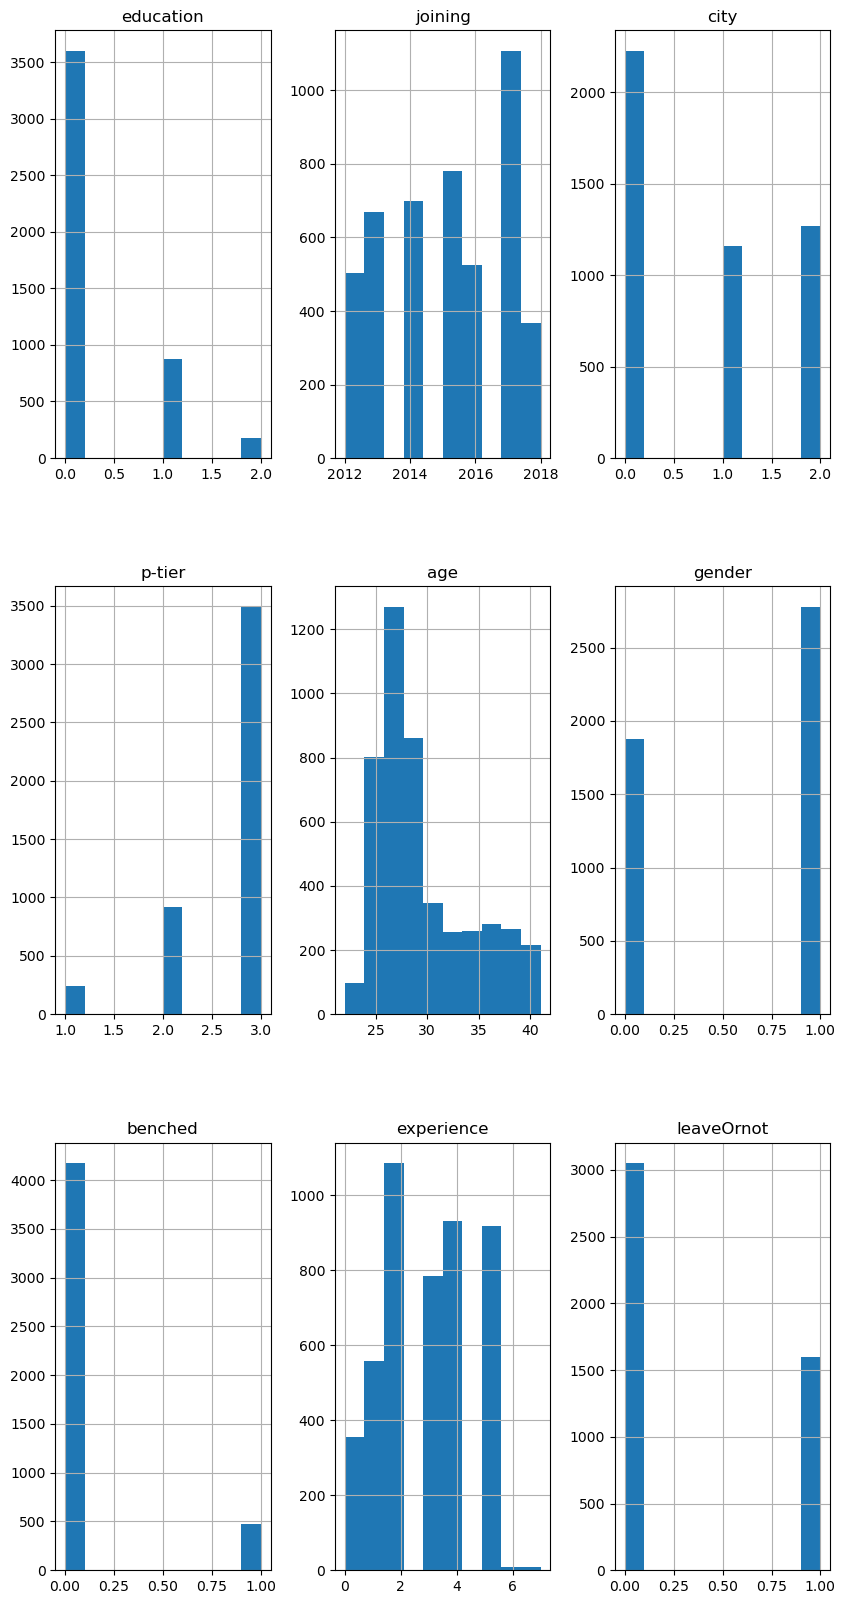

In [10]:
pre_df.hist(figsize=(10,20))

In [11]:
# 상관관계
corr = pre_df.corr()
corr[['leaveOrnot']].sort_values(by='leaveOrnot', ascending=False)[1:]

,leaveOrnot
city,0.201058
joining,0.181705
education,0.080497
benched,0.078438
experience,-0.030504
age,-0.051126
p-tier,-0.197638
gender,-0.220701


Text(0.5, 1.0, 'Correlation')

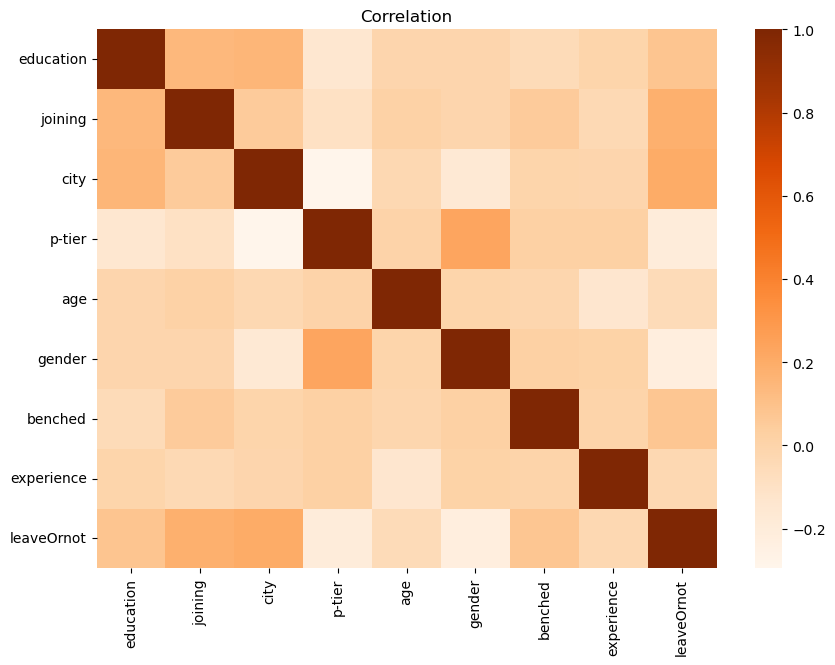

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(corr, cmap='Oranges')
heatmap.set_title('Correlation')

In [13]:
pre_df = pre_df.drop(labels=['benched', 'p-tier'], axis=1)
pre_df

,education,joining,city,age,gender,experience,leaveOrnot
0,0,2017,0,34,1,0,0
1,0,2013,2,28,0,3,1
2,0,2014,1,38,0,2,0
3,1,2016,0,27,1,5,1
4,1,2017,2,24,1,2,1
...,...,...,...,...,...,...,...
4648,0,2013,0,26,0,4,0
4649,1,2013,2,37,1,2,1
4650,1,2018,1,27,1,5,1
4651,0,2012,0,30,1,2,0


In [14]:
pre_df['city'].value_counts()

city
0    2228
2    1268
1    1157
Name: count, dtype: int64

In [15]:
# 언더 샘플링 시행
City1 = pre_df[pre_df.city == 1]
City2 = pre_df[pre_df.city == 0].sample(1157, random_state=124)
City3 = pre_df[pre_df.city == 2].sample(1157, random_state=124)
pre_df = pd.concat([City1, City2, City3]).reset_index(drop=True)

In [16]:
pre_df['city'].value_counts()

city
1    1157
0    1157
2    1157
Name: count, dtype: int64

In [17]:
pre_df['leaveOrnot'].value_counts()

leaveOrnot
0    2213
1    1258
Name: count, dtype: int64

<strong>🤔 타겟 데이터의 비중이 맞지 않기 때문에 over sampling의 방법 중 SMOTE를 사용하여 타겟 데이터의 비중을 맞추도록 하겠다.</strong>

In [18]:
from sklearn.model_selection import train_test_split

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [20]:
y_train_over.value_counts()

leaveOrnot
1    1770
0    1770
Name: count, dtype: int64

#### 📌 SMOTE까지 전처리 과정을 모두 완료하였고, 다음으로 DTC를 사용해보도록 하겠다.

### 1. DTC (DecissionTree Classifier)

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dtc = DecisionTreeClassifier()

features, targets = pre_df.iloc[:,:-1], pre_df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dtc.fit(X_train_over.values, y_train_over)

DecisionTreeClassifier()

#### graphviz 확인

In [22]:
class_names = targets.unique().astype(str)
class_names

array(['0', '1'], dtype='<U21')

In [23]:
from sklearn.tree import export_graphviz

export_graphviz(
    dtc, 
    out_file='./images/pre_dtc03.dot', 
    class_names=class_names, 
    feature_names=features.columns,
    impurity=True, 
    filled=True
)

In [24]:
import graphviz

with open('./images/pre_dtc03.dot') as f:
    pre_dtc03 = f.read()

pre_dtc03_graph = graphviz.Source(pre_dtc03)

In [25]:
pre_dtc03_graph.render(filename='pre_dtc03', directory='./images', format='png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.801463 to fit


'images\\pre_dtc03.png'

<img src='./images/pre_dtc03.png'>

In [26]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=124)

dtc = DecisionTreeClassifier()
parameters = {'max_depth': range(20, 26), 'min_samples_split': range(10, 16)}

g_dtc = GridSearchCV(dtc, param_grid=parameters, cv=10, refit=True, return_train_score=True, n_jobs=-1)

g_dtc.fit(X_train_over, y_train_over)

pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 20, 'min_samples_split': 10}",0.798588,26,0.771186,0.790960,0.776836
1,"{'max_depth': 20, 'min_samples_split': 11}",0.798870,18,0.768362,0.785311,0.782486
2,"{'max_depth': 20, 'min_samples_split': 12}",0.798870,18,0.765537,0.785311,0.779661
3,"{'max_depth': 20, 'min_samples_split': 13}",0.800565,5,0.774011,0.788136,0.782486
4,"{'max_depth': 20, 'min_samples_split': 14}",0.798023,30,0.765537,0.788136,0.776836
5,"{'max_depth': 20, 'min_samples_split': 15}",0.799435,11,0.765537,0.785311,0.779661
6,"{'max_depth': 21, 'min_samples_split': 10}",0.799153,16,0.771186,0.790960,0.776836
7,"{'max_depth': 21, 'min_samples_split': 11}",0.797740,34,0.768362,0.788136,0.782486
8,"{'max_depth': 21, 'min_samples_split': 12}",0.798588,23,0.765537,0.785311,0.779661
9,"{'max_depth': 21, 'min_samples_split': 13}",0.800565,5,0.774011,0.788136,0.782486


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [28]:
from sklearn.metrics import accuracy_score
import numpy as np

dtc = g_dtc.best_estimator_
prediction = dtc.predict(X_test)
dtc_ac = round(accuracy_score(y_test, prediction), 4)
dtc_pr = round(precision_score(y_test, prediction), 4)
dtc_rc = round(recall_score(y_test, prediction), 4)
dtc_f1 = round(f1_score(y_test, prediction), 4)
dtc_rac = round(roc_auc_score(y_test, prediction), 4)

오차 행렬
[[372  71]
 [ 89 163]]
정확도: 0.7698, 정밀도: 0.6966, 재현율: 0.6468, F1: 0.6708, ROC-AUC: 0.7433
################################################################################


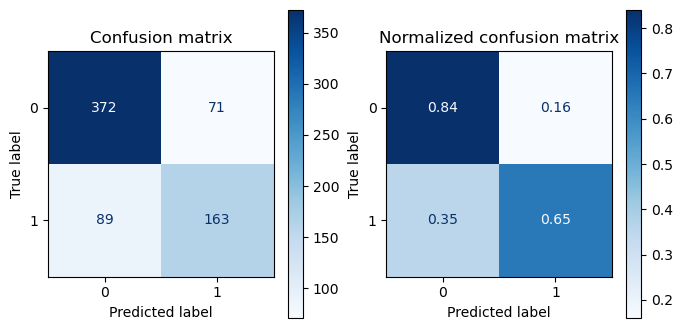

In [29]:
get_evaluation(y_test, prediction, dtc, X_test)

In [30]:
proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)

for proba, predict in zip(proba.tolist(), prediction.tolist()):
    print(proba, predict)

[0.45454545454545453, 0.5454545454545454] 1
[0.9166666666666666, 0.08333333333333333] 0
[0.8333333333333334, 0.16666666666666666] 0
[1.0, 0.0] 0
[0.3333333333333333, 0.6666666666666666] 1
[0.9166666666666666, 0.08333333333333333] 0
[0.4166666666666667, 0.5833333333333334] 1
[0.9, 0.1] 0
[0.09090909090909091, 0.9090909090909091] 1
[0.8, 0.2] 0
[0.09090909090909091, 0.9090909090909091] 1
[0.0, 1.0] 1
[1.0, 0.0] 0
[0.8, 0.2] 0
[1.0, 0.0] 0
[0.7272727272727273, 0.2727272727272727] 0
[0.4, 0.6] 1
[0.8333333333333334, 0.16666666666666666] 0
[0.3333333333333333, 0.6666666666666666] 1
[1.0, 0.0] 0
[0.625, 0.375] 0
[0.8666666666666667, 0.13333333333333333] 0
[1.0, 0.0] 0
[0.625, 0.375] 0
[1.0, 0.0] 0
[0.3333333333333333, 0.6666666666666666] 1
[0.3333333333333333, 0.6666666666666666] 1
[0.8, 0.2] 0
[0.09090909090909091, 0.9090909090909091] 1
[0.9166666666666666, 0.08333333333333333] 0
[0.3333333333333333, 0.6666666666666666] 1
[0.6666666666666666, 0.3333333333333333] 0
[1.0, 0.0] 0
[1.0, 0.0] 0


In [31]:
from sklearn.preprocessing import Binarizer

threshold = 0.5

proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)

In [32]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)

오차 행렬
[[372  71]
 [ 89 163]]
정확도: 0.7698, 정밀도: 0.6966, 재현율: 0.6468, F1: 0.6708, ROC-AUC: 0.7433
################################################################################


In [33]:
def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)

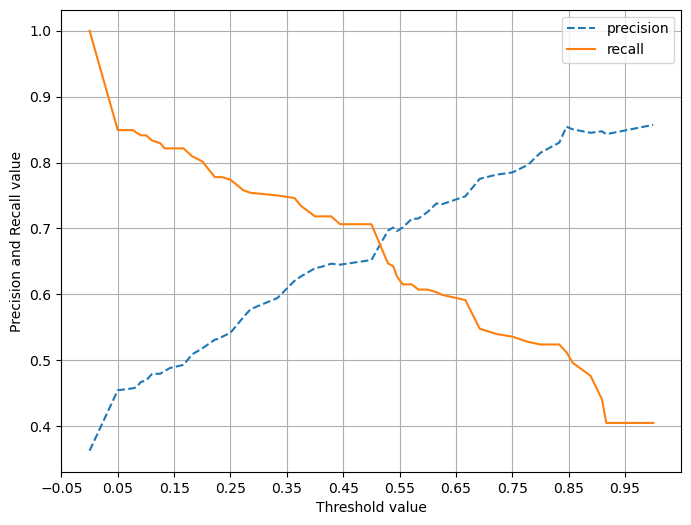

In [34]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test , proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))

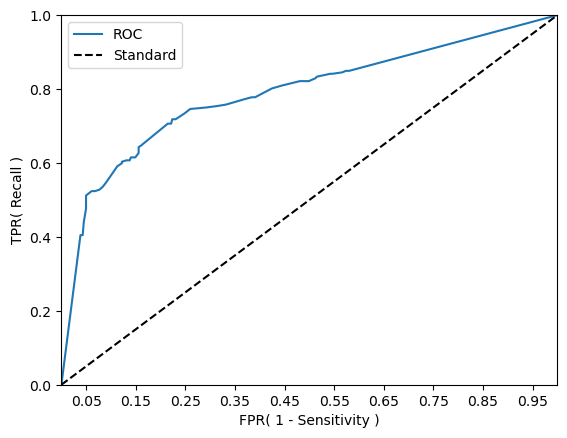

In [35]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))

#### 📌 1. DTC 결과
DCT를 사용하여 <strong>임계치를 0.5로</strong> 두었을 때는  
<strong>정확도: 0.7698, 정밀도: 0.6966, 재현율: 0.6468, F1: 0.6708, ROC-AUC: 0.7433</strong>이 나왔다.  
재현율이 조금 아쉽긴 하지만 괜찮은 성능의 모델이다.   
#### SVC를 사용해보도록 하겠다.

### 2. SVC (Support Vector Classifier)

In [36]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

parameters = {
    'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'rbf']
}

svc = SVC(probability=True)

svc_pipe = Pipeline([('svc', svc)])

g_svc = GridSearchCV(svc_pipe, param_grid=parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)
# scoring='roc_auc'

In [37]:
g_svc.fit(X_train_over, y_train_over)

GridSearchCV(cv=3, estimator=Pipeline(steps=[('svc', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True)

In [38]:
svc_result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
# print(svc_result_df['params'][53])
display(svc_result_df)

print(svc_result_df[svc_result_df['rank_test_score'] == 1])
print(g_svc.best_estimator_)

,params,mean_test_score,rank_test_score
0,"{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...",0.606215,58
1,"{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...",0.543220,71
2,"{'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...",0.606215,58
3,"{'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...",0.572881,66
4,"{'svc__C': 0.001, 'svc__gamma': 0.1, 'svc__ker...",0.606215,58
...,...,...,...
67,"{'svc__C': 100, 'svc__gamma': 1, 'svc__kernel'...",0.798588,3
68,"{'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...",0.651130,25
69,"{'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...",0.762147,8
70,"{'svc__C': 100, 'svc__gamma': 100, 'svc__kerne...",0.651130,25


                                               params  mean_test_score  \
53  {'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel...         0.805367   

    rank_test_score  
53                1  
Pipeline(steps=[('svc', SVC(C=10, gamma=0.1, probability=True))])


In [39]:
svc = g_svc.best_estimator_
prediction = svc.predict(X_test)
svc_ac = round(accuracy_score(y_test, prediction), 4)
svc_pr = round(precision_score(y_test, prediction), 4)
svc_rc = round(recall_score(y_test, prediction), 4)
svc_f1 = round(f1_score(y_test, prediction), 4)
svc_rac = round(roc_auc_score(y_test, prediction), 4)

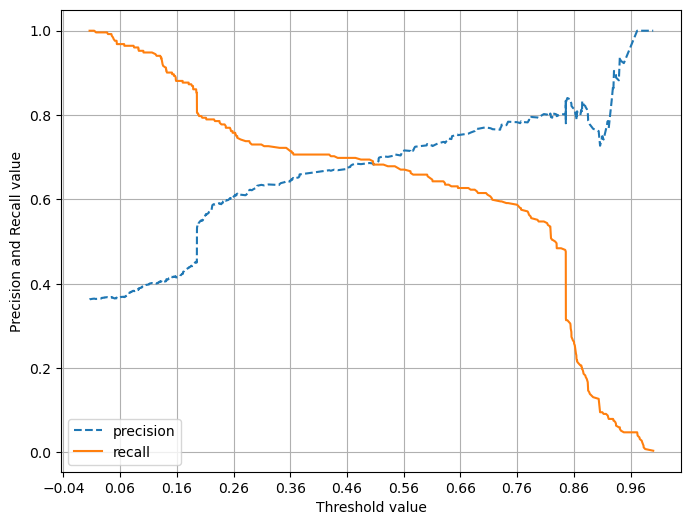

In [40]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test , proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, svc.predict_proba(X_test)[:, 1].reshape(-1, 1))

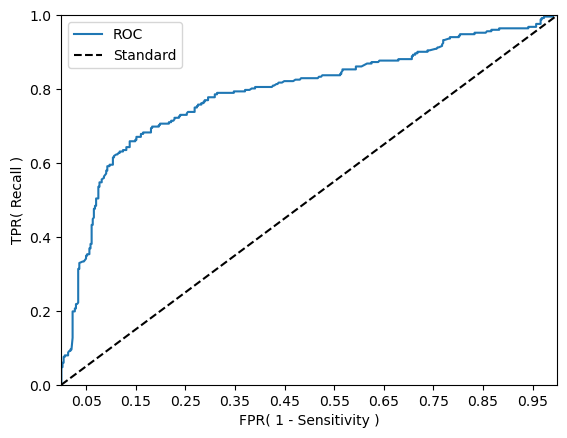

In [41]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, svc.predict_proba(X_test)[:, 1].reshape(-1, 1))

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Greys, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[371  72]
 [ 81 171]]
정확도: 0.7799, 정밀도: 0.7037, 재현율: 0.6786, F1: 0.6909, ROC-AUC: 0.7580
################################################################################


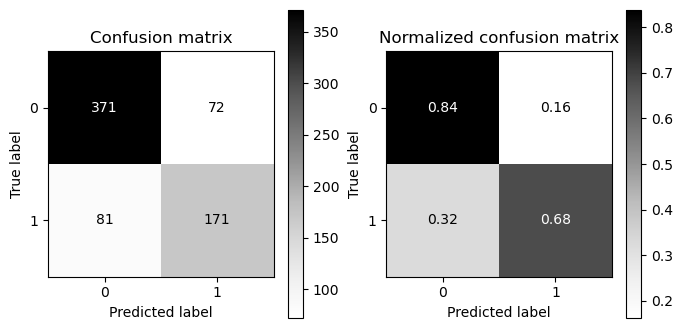

In [43]:
get_evaluation(y_test, prediction, svc, X_test)

#### 📌 SVC (Support Vector Classifier)
SVC (Support Vector Classifier)를 사용하여 'best_estimator_'를 뽑아봤을 때,  
<strong>C=10, gamma=0.1, kernerl=rbf</strong> 일 때가  
<strong>정확도: 0.7799, 정밀도: 0.7037, 재현율: 0.6786, F1: 0.6909, ROC-AUC: 0.7580</strong>이 나왔다.  
역시 재현율이 조금 아쉽긴 하지만 DTC 보다는 성능이 더 좋게 나왔다.  
다음으로는 KNN을 사용해서 확인해보도록 하겠다.

### 3. KNN (K-Nearest Neighbor)

In [44]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

knn = KNeighborsClassifier()

parameters = {
    'n_neighbors': [3, 5, 7, 9, 11, 13]
}

g_knn = GridSearchCV(knn, param_grid=parameters, cv=5, refit=True, return_train_score=True)

g_knn.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13]},
             return_train_score=True)

In [45]:
knn_result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(knn_result_df)

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 3},0.772316,1
1,{'n_neighbors': 5},0.764972,2
2,{'n_neighbors': 7},0.756780,3
3,{'n_neighbors': 9},0.754237,4
4,{'n_neighbors': 11},0.753672,5
5,{'n_neighbors': 13},0.747740,6


In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Reds, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [47]:
knn = g_knn.best_estimator_
prediction = knn.predict(X_test)
knn_ac = round(accuracy_score(y_test , prediction), 4)
knn_pr = round(precision_score(y_test , prediction), 4)
knn_rc = round(recall_score(y_test , prediction), 4)
knn_f1 = round(f1_score(y_test , prediction), 4)
knn_rac = round(roc_auc_score(y_test , prediction), 4)

KNeighborsClassifier(n_neighbors=3)
오차 행렬
[[356  87]
 [ 96 156]]
정확도: 0.7367, 정밀도: 0.6420, 재현율: 0.6190, F1: 0.6303, ROC-AUC: 0.7113
################################################################################


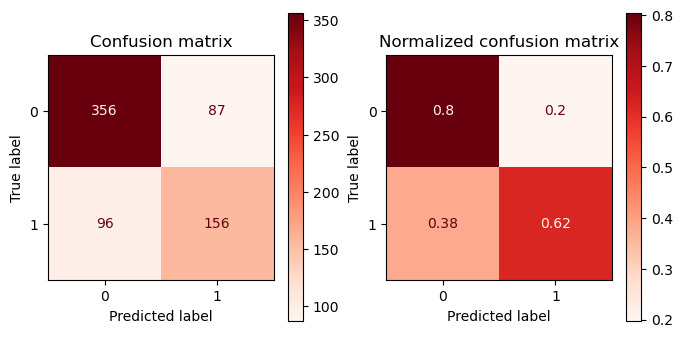

In [48]:
print(knn)
get_evaluation(y_test, prediction, knn, X_test)

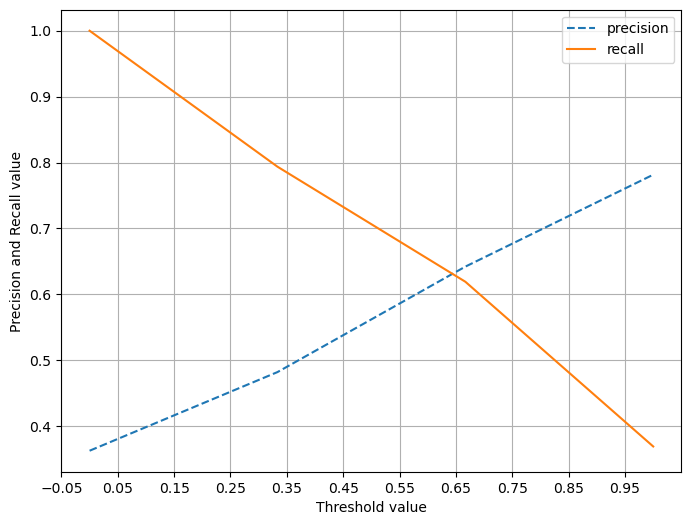

In [49]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test , proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, knn.predict_proba(X_test)[:, 1].reshape(-1, 1))

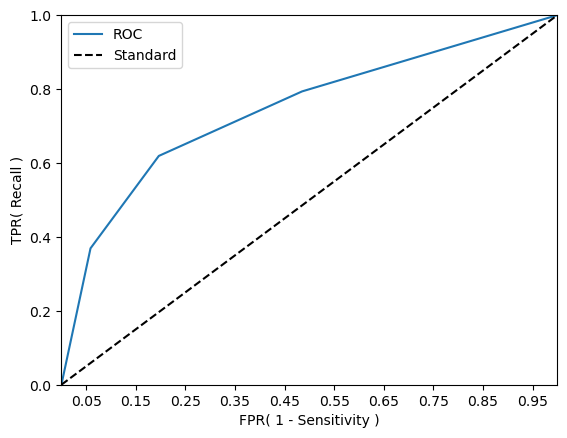

In [50]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, knn.predict_proba(X_test)[:, 1].reshape(-1, 1))

#### 📌 3. KNN (K-Nearest Neighbor) 결과
KNN를 사용하여 'best_estimator_'를 뽑아봤을 때,  
<strong>n_neighbors=3</strong> 일 때가  
<strong>정확도: 0.7367, 정밀도: 0.6420, 재현율: 0.6190, F1: 0.6303, ROC-AUC: 0.7113</strong> 로 가장 높게 나왔다.  
DTC와 SVC 보다 더 성능이 낮은 걸로 나왔다.    
다음으로는 Bagging 방식 중 Random Forest을 사용해서 확인해보도록 하겠다.

### 4. Bagging (Random Forest)

In [51]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

parameters = {'max_depth': range(10, 14), 'min_samples_split': range(5, 10)}

rfc = RandomForestClassifier(n_estimators=50)

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

g_rfc = GridSearchCV(rfc, param_grid=parameters, cv=10, n_jobs=-1)

# g_rfc.fit(X_train, y_train)
g_rfc.fit(X_train_over, y_train_over)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=50),
             n_jobs=-1,
             param_grid={'max_depth': range(10, 14),
                         'min_samples_split': range(5, 10)})

In [52]:
rfc_result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(rfc_result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 10, 'min_samples_split': 5}",0.821751,13
1,"{'max_depth': 10, 'min_samples_split': 6}",0.821186,14
2,"{'max_depth': 10, 'min_samples_split': 7}",0.822599,11
3,"{'max_depth': 10, 'min_samples_split': 8}",0.818644,20
4,"{'max_depth': 10, 'min_samples_split': 9}",0.819209,18
5,"{'max_depth': 11, 'min_samples_split': 5}",0.822881,8
6,"{'max_depth': 11, 'min_samples_split': 6}",0.820056,16
7,"{'max_depth': 11, 'min_samples_split': 7}",0.824011,6
8,"{'max_depth': 11, 'min_samples_split': 8}",0.824576,5
9,"{'max_depth': 11, 'min_samples_split': 9}",0.825706,1


In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Oranges, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [54]:
rfc = g_rfc.best_estimator_
prediction = rfc.predict(X_test)
rfc_ac = round(accuracy_score(y_test , prediction), 4)
rfc_pr = round(precision_score(y_test , prediction), 4)
rfc_rc = round(recall_score(y_test , prediction), 4)
rfc_f1 = round(f1_score(y_test , prediction), 4)
rfc_rac = round(roc_auc_score(y_test , prediction), 4)

RandomForestClassifier(max_depth=11, min_samples_split=9, n_estimators=50)
오차 행렬
[[397  46]
 [ 88 164]]
정확도: 0.8072, 정밀도: 0.7810, 재현율: 0.6508, F1: 0.7100, ROC-AUC: 0.7735
################################################################################


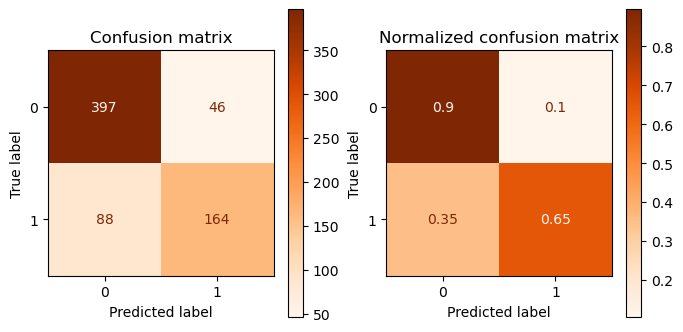

In [55]:
print(rfc)
get_evaluation(y_test, prediction, rfc, X_test)

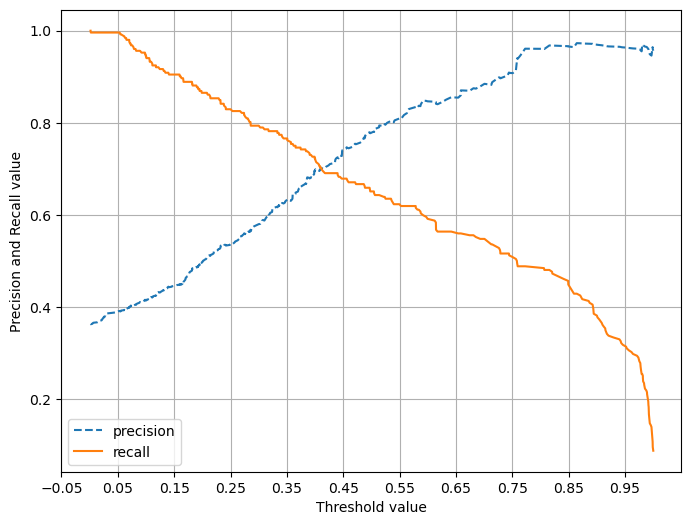

In [56]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test , proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, rfc.predict_proba(X_test)[:, 1].reshape(-1, 1))

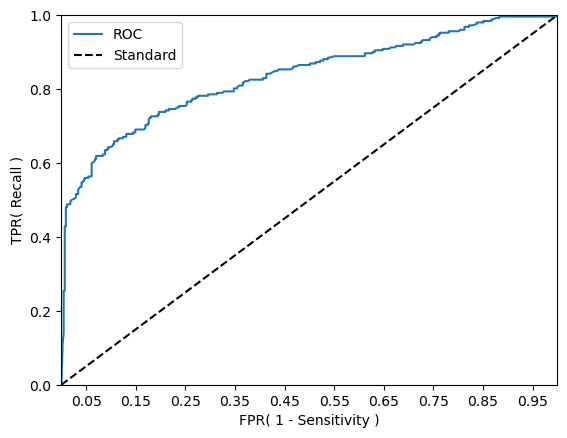

In [57]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, rfc.predict_proba(X_test)[:, 1].reshape(-1, 1))

#### 📌 4. Bagging (Random Forest) 결과
Bagging의 Random Forest을 사용하여 'best_estimator_'를 뽑아봤을 때,  
<strong>max_depth=12, min_samples_split=7, n_estimators=50</strong> 일 때가  
<strong>정확도: 0.8072, 정밀도: 0.7810, 재현율: 0.6508, F1: 0.7100, ROC-AUC: 0.7735</strong> 로 가장 높게 나왔다.    
다음으로는 4가지 방식들 이외의 방식인 앙상블 학습에 대해 확인해보도록 해보겠다.

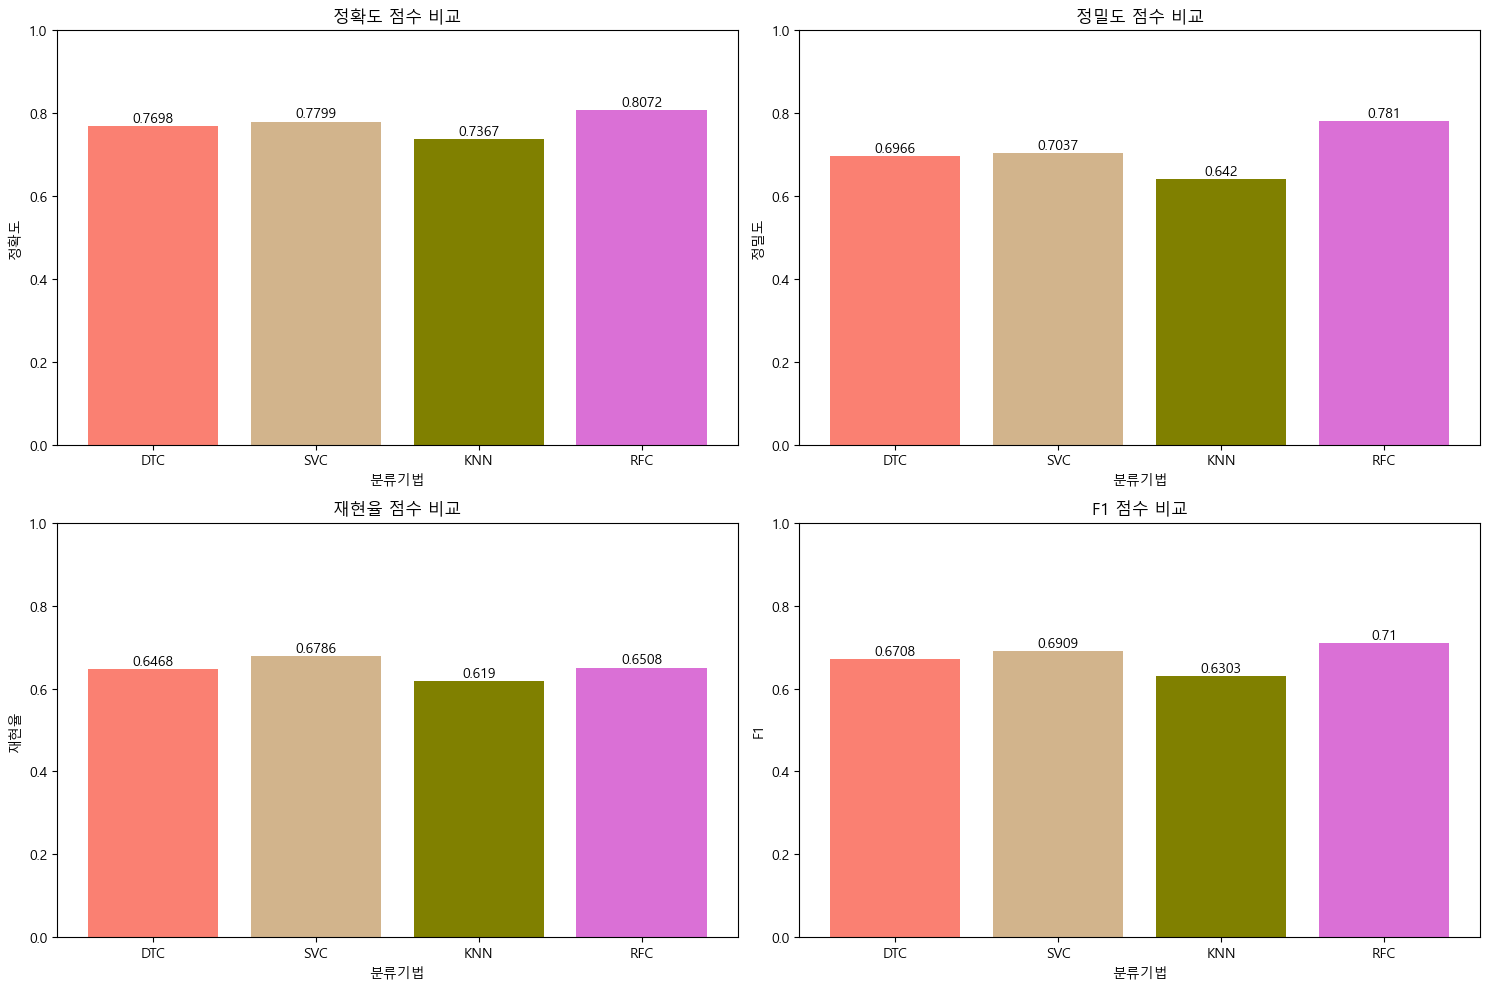

In [58]:
import matplotlib.pyplot as plt

# 데이터 설정
classifiers = ['DTC', 'SVC', 'KNN', 'RFC']
colors = ['salmon', 'tan', 'olive', 'orchid']

accuracies = [dtc_ac, svc_ac, knn_ac, rfc_ac]
precisions = [dtc_pr, svc_pr, knn_pr, rfc_pr]
f1_scores = [dtc_f1, svc_f1, knn_f1, rfc_f1]
recalls = [dtc_rc, svc_rc, knn_rc, rfc_rc]

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프 출력
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2행 2열의 그래프

# 정확도 그래프
axes[0, 0].bar(classifiers, accuracies, color=colors)
axes[0, 0].set_title('정확도 점수 비교')
axes[0, 0].set_xlabel('분류기법')
axes[0, 0].set_ylabel('정확도')
axes[0, 0].set_ylim(0, 1)
for i, v in enumerate(accuracies):
    axes[0, 0].text(i, v + 0.01, str(v), color='black', ha='center')

# 정밀도 그래프
axes[0, 1].bar(classifiers, precisions, color=colors)
axes[0, 1].set_title('정밀도 점수 비교')
axes[0, 1].set_xlabel('분류기법')
axes[0, 1].set_ylabel('정밀도')
axes[0, 1].set_ylim(0, 1)
for i, v in enumerate(precisions):
    axes[0, 1].text(i, v + 0.01, str(v), color='black', ha='center')

# 재현율 그래프
axes[1, 0].bar(classifiers, recalls, color=colors)
axes[1, 0].set_title('재현율 점수 비교')
axes[1, 0].set_xlabel('분류기법')
axes[1, 0].set_ylabel('재현율')
axes[1, 0].set_ylim(0, 1)
for i, v in enumerate(recalls):
    axes[1, 0].text(i, v + 0.01, str(v), color='black', ha='center')

# F1 점수 그래프
axes[1, 1].bar(classifiers, f1_scores, color=colors)
axes[1, 1].set_title('F1 점수 비교')
axes[1, 1].set_xlabel('분류기법')
axes[1, 1].set_ylabel('F1')
axes[1, 1].set_ylim(0, 1)
for i, v in enumerate(f1_scores):
    axes[1, 1].text(i, v + 0.01, str(v), color='black', ha='center')

# 전체 그래프 보여주기
plt.tight_layout()
plt.show()

### 📝 중간 평가

1. 정확도: 샘플 중 올바르게 예측된 샘플의 비율이다. RFC가 0.8072로 가장 높다.  
2. 정밀도: 긍정으로 예측된 샘플 중 실제로 긍정인 샘플의 비율입니다. RFC가 0.781로 가장 높다.  
3. 재현율: 실제 긍정 샘플 중 긍정으로 정확하게 예측된 샘플의 비율이다. SVC가 0.6786로 가장 높다.
4. F1 점수: 정밀도와 재현율의 조화 평균이다. RFC가 0.71으로 가장 높다.

<strong>RFC가</strong> 대부분의 항목에서 가장 높은 점수를 보여줌으로써 <strong>전반적으로 가장 우수한 성능</strong>을 보여준다.  
특히 <strong>정확도와 정밀도</strong>에서 높은 점수를 기록했다.  
이러한 결과는 RFC가 다양한 상황에서 높은 예측 성능을 발휘할 수 있음을 시사한다.  

다음으론 위 4가지 분류기법 이외의 앙상블 학습의 Voting 방식도 확인 해보도록 하겠다.

### 5. Voting

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

dtc_parameters = {'max_depth': range(20, 26), 'min_samples_split': range(10, 16)}

dtc = DecisionTreeClassifier()

g_dtc = GridSearchCV(dtc, param_grid=dtc_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

In [60]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split

svc_parameters = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                  'svc__kernel': ['linear', 'rbf']}

svc = SVC(probability=True)

svc_pipe = Pipeline([('svc', svc)])
g_svc = GridSearchCV(svc_pipe, param_grid=svc_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

knn_parameters = {'knn__n_neighbors': [3, 5, 7, 9, 11, 13]}

knn = KNeighborsClassifier()

knn_pipe = Pipeline([('knn', knn)])
g_knn = GridSearchCV(knn_pipe, param_grid=knn_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

In [62]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

parameters = {'max_depth': range(10, 14), 'min_samples_split': range(5, 10)}

rfc = RandomForestClassifier(n_estimators=50)

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

g_rfc = GridSearchCV(rfc, param_grid=parameters, cv=10, n_jobs=-1)

In [63]:
g_dtc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(20, 26),
                         'min_samples_split': range(10, 16)},
             return_train_score=True)

In [64]:
g_svc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('svc', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True)

In [65]:
g_knn.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('knn', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11, 13]},
             return_train_score=True)

In [66]:
g_rfc.fit(X_train_over, y_train_over)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=50),
             n_jobs=-1,
             param_grid={'max_depth': range(10, 14),
                         'min_samples_split': range(5, 10)})

In [67]:
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(dtc_result_df)

dtc = g_dtc.best_estimator_

print(dtc_result_df[dtc_result_df['rank_test_score'] == 1])
# print(g_dtc.best_estimator_)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 20, 'min_samples_split': 10}",0.799435,28
1,"{'max_depth': 20, 'min_samples_split': 11}",0.798023,36
2,"{'max_depth': 20, 'min_samples_split': 12}",0.800565,22
3,"{'max_depth': 20, 'min_samples_split': 13}",0.801412,9
4,"{'max_depth': 20, 'min_samples_split': 14}",0.800847,16
5,"{'max_depth': 20, 'min_samples_split': 15}",0.801695,3
6,"{'max_depth': 21, 'min_samples_split': 10}",0.798588,35
7,"{'max_depth': 21, 'min_samples_split': 11}",0.799435,28
8,"{'max_depth': 21, 'min_samples_split': 12}",0.801130,12
9,"{'max_depth': 21, 'min_samples_split': 13}",0.800847,16


                                        params  mean_test_score  \
11  {'max_depth': 21, 'min_samples_split': 15}         0.801977   

    rank_test_score  
11                1  


In [68]:
svc_result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(svc_result_df)

svc = g_svc.best_estimator_
print(svc_result_df[svc_result_df['rank_test_score'] == 1])
print(g_svc.best_estimator_)
# print(svc_result_df['params'][53])

,params,mean_test_score,rank_test_score
0,"{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...",0.613842,58
1,"{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...",0.542373,71
2,"{'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...",0.613842,58
3,"{'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...",0.577401,64
4,"{'svc__C': 0.001, 'svc__gamma': 0.1, 'svc__ker...",0.613842,58
...,...,...,...
67,"{'svc__C': 100, 'svc__gamma': 1, 'svc__kernel'...",0.797740,4
68,"{'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...",0.651130,21
69,"{'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...",0.763842,8
70,"{'svc__C': 100, 'svc__gamma': 100, 'svc__kerne...",0.651130,21


                                               params  mean_test_score  \
53  {'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel...         0.801695   

    rank_test_score  
53                1  
Pipeline(steps=[('svc', SVC(C=10, gamma=0.1, probability=True))])


In [69]:
knn_result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(knn_result_df)

knn = g_knn.best_estimator_
print(knn_result_df[knn_result_df['rank_test_score'] == 1])

,params,mean_test_score,rank_test_score
0,{'knn__n_neighbors': 3},0.772316,1
1,{'knn__n_neighbors': 5},0.764972,2
2,{'knn__n_neighbors': 7},0.756780,3
3,{'knn__n_neighbors': 9},0.754237,4
4,{'knn__n_neighbors': 11},0.753672,5
5,{'knn__n_neighbors': 13},0.747740,6


                    params  mean_test_score  rank_test_score
0  {'knn__n_neighbors': 3}         0.772316                1


In [70]:
rfc_result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(rfc_result_df)

rfc = g_rfc.best_estimator_
print(rfc_result_df[rfc_result_df['rank_test_score'] == 1])

,params,mean_test_score,rank_test_score
0,"{'max_depth': 10, 'min_samples_split': 5}",0.824576,4
1,"{'max_depth': 10, 'min_samples_split': 6}",0.823164,10
2,"{'max_depth': 10, 'min_samples_split': 7}",0.821751,17
3,"{'max_depth': 10, 'min_samples_split': 8}",0.820904,18
4,"{'max_depth': 10, 'min_samples_split': 9}",0.822034,14
5,"{'max_depth': 11, 'min_samples_split': 5}",0.828531,1
6,"{'max_depth': 11, 'min_samples_split': 6}",0.822316,12
7,"{'max_depth': 11, 'min_samples_split': 7}",0.823729,8
8,"{'max_depth': 11, 'min_samples_split': 8}",0.818927,20
9,"{'max_depth': 11, 'min_samples_split': 9}",0.822316,12


                                      params  mean_test_score  rank_test_score
5  {'max_depth': 11, 'min_samples_split': 5}         0.828531                1


### 5-1. Hard Voting

In [71]:
from sklearn.ensemble import VotingClassifier

# 하드 보팅
hvc = VotingClassifier(estimators=[('dtc', dtc),
                                    ('svc', svc_pipe),
                                    ('knn', knn_pipe),
                                    ('rfc', rfc)],
                                    voting='hard',
                                    n_jobs=-1)

In [72]:
hvc.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=21,
                                                     min_samples_split=15)),
                             ('svc',
                              Pipeline(steps=[('svc', SVC(probability=True))])),
                             ('knn',
                              Pipeline(steps=[('knn',
                                               KNeighborsClassifier())])),
                             ('rfc',
                              RandomForestClassifier(max_depth=11,
                                                     min_samples_split=5,
                                                     n_estimators=50))],
                 n_jobs=-1)

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Greens, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [74]:
prediction = hvc.predict(X_test)
hv_ac = round(accuracy_score(y_test , prediction), 4)
hv_pr = round(precision_score(y_test , prediction), 4)
hv_rc = round(recall_score(y_test , prediction), 4)
hv_f1 = round(f1_score(y_test , prediction), 4)
hv_rac = round(roc_auc_score(y_test , prediction), 4)

오차 행렬
[[390  53]
 [ 93 159]]
정확도: 0.7899, 정밀도: 0.7500, 재현율: 0.6310, F1: 0.6853, ROC-AUC: 0.7557
################################################################################


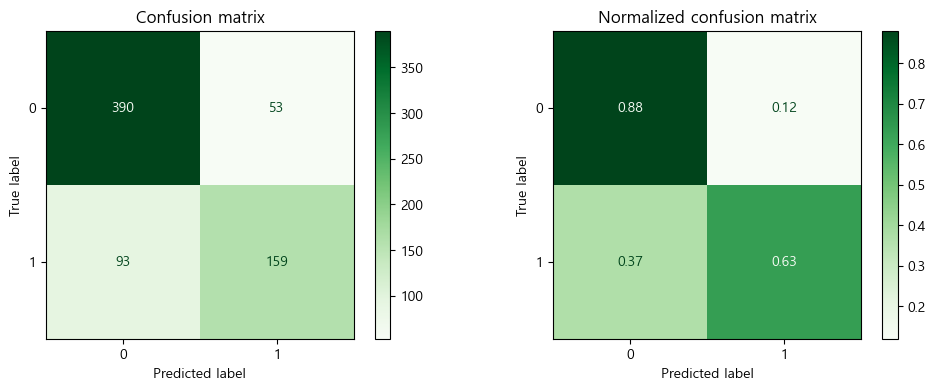

In [75]:
get_evaluation(y_test, prediction, hvc, X_test)

### 5-2. Soft Voting

In [76]:
from sklearn.ensemble import VotingClassifier

# 소프트 보팅
vc = VotingClassifier(estimators=[('dtc', dtc),
                                ('svc', svc_pipe),
                                ('knn', knn_pipe),
                                ('rfc', rfc)],
                                voting='soft',
                                n_jobs=-1)

In [77]:
vc.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=21,
                                                     min_samples_split=15)),
                             ('svc',
                              Pipeline(steps=[('svc', SVC(probability=True))])),
                             ('knn',
                              Pipeline(steps=[('knn',
                                               KNeighborsClassifier())])),
                             ('rfc',
                              RandomForestClassifier(max_depth=11,
                                                     min_samples_split=5,
                                                     n_estimators=50))],
                 n_jobs=-1, voting='soft')

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Purples, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [79]:
prediction = vc.predict(X_test)
sv_ac = round(accuracy_score(y_test , prediction), 4)
sv_pr = round(precision_score(y_test , prediction), 4)
sv_rc = round(recall_score(y_test , prediction), 4)
sv_f1 = round(f1_score(y_test , prediction), 4)
sv_rac = round(roc_auc_score(y_test , prediction), 4)

오차 행렬
[[377  66]
 [ 89 163]]
정확도: 0.7770, 정밀도: 0.7118, 재현율: 0.6468, F1: 0.6778, ROC-AUC: 0.7489
################################################################################


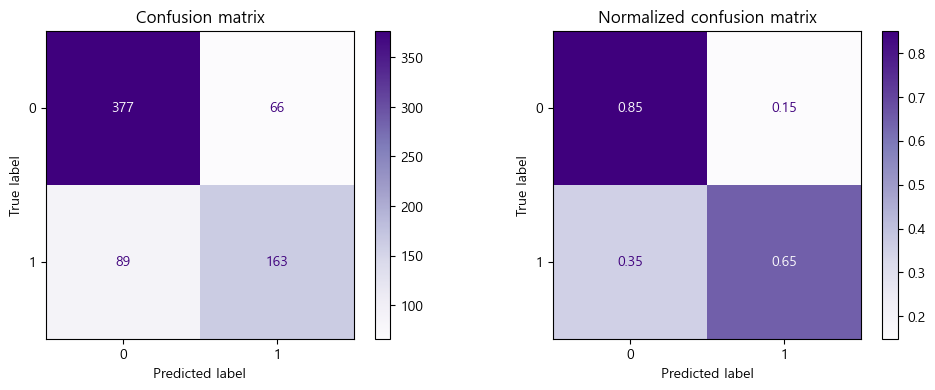

In [80]:
get_evaluation(y_test, prediction, vc, X_test)

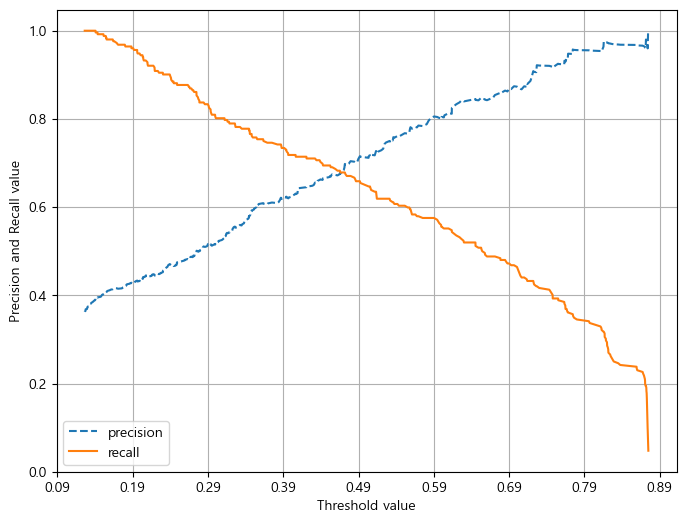

In [81]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test , proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, vc.predict_proba(X_test)[:, 1].reshape(-1, 1))

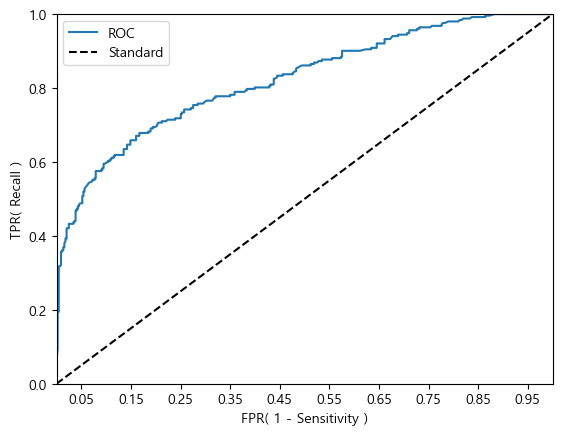

In [82]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, vc.predict_proba(X_test)[:, 1].reshape(-1, 1))

#### 📌 5. Voting 결과  
Hard Voting과 Soft Voting 두가지 방식을 모두 확인 해보았다.  
<strong>Hard Voting</strong> 방식의 결과는  
<strong>정확도: 0.7899, 정밀도: 0.7500, 재현율: 0.6310, F1: 0.6853, ROC-AUC: 0.7557</strong>이었고,  
<strong>Soft Voting</strong> 방식의 결과는  
<strong>정확도: 0.7770, 정밀도: 0.7118, 재현율: 0.6468, F1: 0.6778, ROC-AUC: 0.7489
</strong>이었다.  

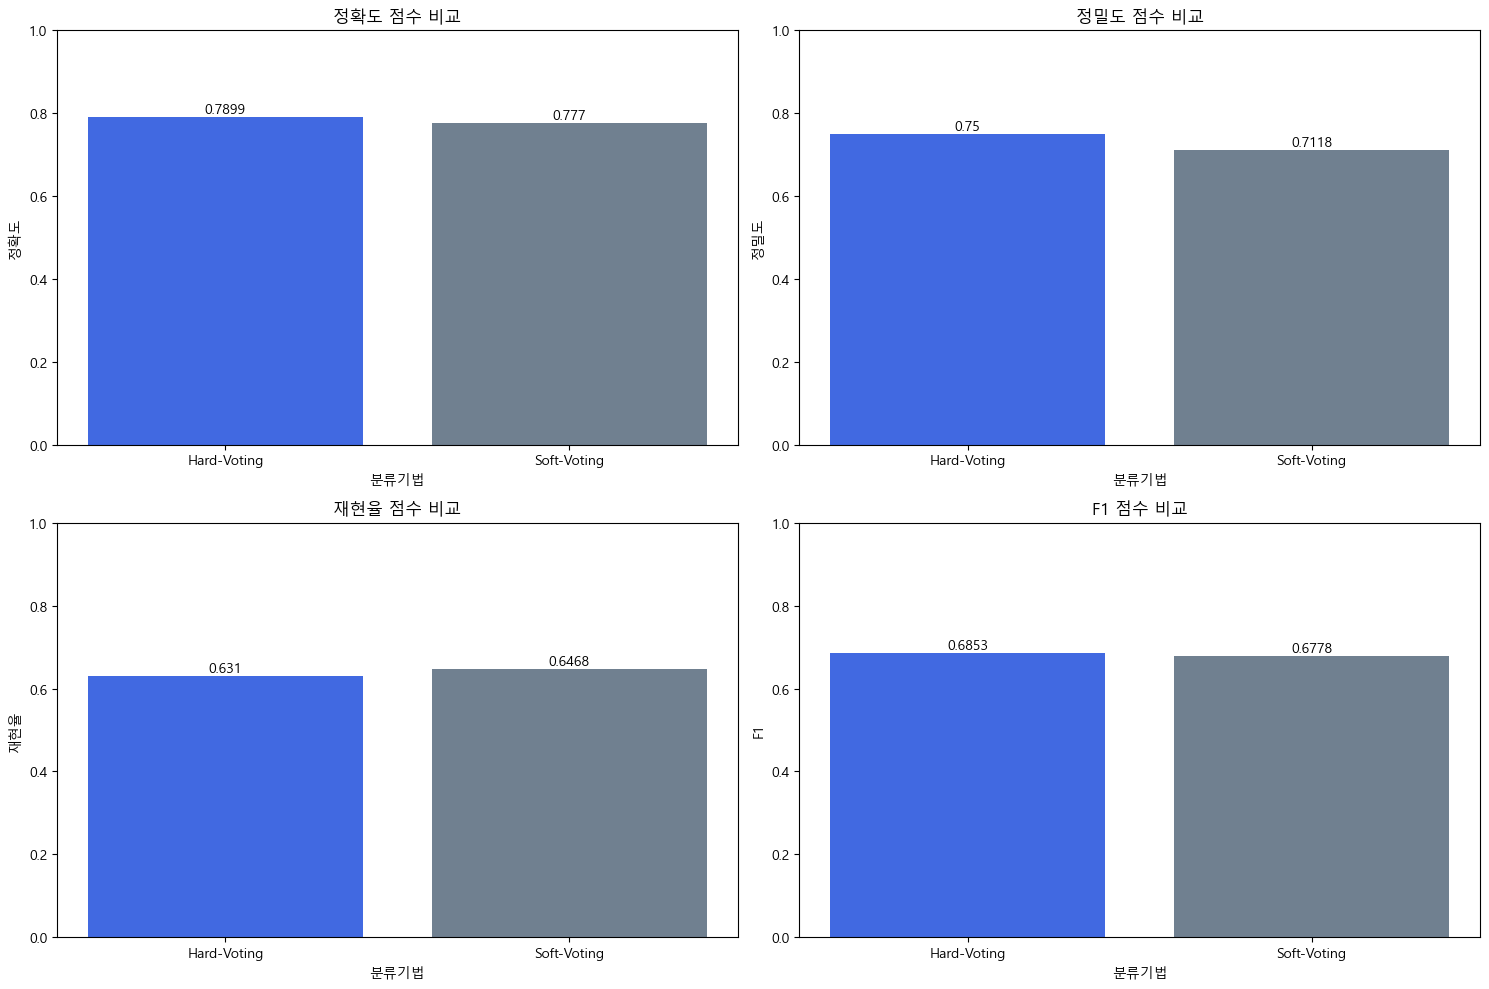

In [83]:
import matplotlib.pyplot as plt

# 데이터 설정
classifiers = ['Hard-Voting', 'Soft-Voting']
colors = ['royalblue', 'slategrey']

accuracies = [hv_ac, sv_ac]
precisions = [hv_pr, sv_pr]
f1_scores = [hv_f1, sv_f1]
recalls = [hv_rc, sv_rc]

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프 출력
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2행 2열의 그래프

# 정확도 그래프
axes[0, 0].bar(classifiers, accuracies, color=colors)
axes[0, 0].set_title('정확도 점수 비교')
axes[0, 0].set_xlabel('분류기법')
axes[0, 0].set_ylabel('정확도')
axes[0, 0].set_ylim(0, 1)
for i, v in enumerate(accuracies):
    axes[0, 0].text(i, v + 0.01, str(v), color='black', ha='center')

# 정밀도 그래프
axes[0, 1].bar(classifiers, precisions, color=colors)
axes[0, 1].set_title('정밀도 점수 비교')
axes[0, 1].set_xlabel('분류기법')
axes[0, 1].set_ylabel('정밀도')
axes[0, 1].set_ylim(0, 1)
for i, v in enumerate(precisions):
    axes[0, 1].text(i, v + 0.01, str(v), color='black', ha='center')

# 재현율 그래프
axes[1, 0].bar(classifiers, recalls, color=colors)
axes[1, 0].set_title('재현율 점수 비교')
axes[1, 0].set_xlabel('분류기법')
axes[1, 0].set_ylabel('재현율')
axes[1, 0].set_ylim(0, 1)
for i, v in enumerate(recalls):
    axes[1, 0].text(i, v + 0.01, str(v), color='black', ha='center')

# F1 점수 그래프
axes[1, 1].bar(classifiers, f1_scores, color=colors)
axes[1, 1].set_title('F1 점수 비교')
axes[1, 1].set_xlabel('분류기법')
axes[1, 1].set_ylabel('F1')
axes[1, 1].set_ylim(0, 1)
for i, v in enumerate(f1_scores):
    axes[1, 1].text(i, v + 0.01, str(v), color='black', ha='center')

# 전체 그래프 보여주기
plt.tight_layout()
plt.show()

### 📝 Voting 시각화 결과

1. 정확도: Hard Voting이 Soft Voting보다 약간 높은 정확도를 보여준다.  
   이는 <strong>Hard Voting이 전반적인 예측 정확성에서 조금 더 우수함</strong>을 의미한다.  
2. 정밀도: Hard Voting이 더 높은 정밀도를 가지고 있다.  
   이는 <strong>Hard Voting이 긍정적 예측의 신뢰도가 높음</strong>을 나타낸다.  
3. 재현율: Soft Voting이 재현율에서 더 높다.  
4. F1 점수: Hard Voting이 더 높은 F1 점수를 보여준다.  
   이는 <strong>정밀도와 재현율의 균형이 Hard Voting에서 더 잘 맞춰져 있음</strong>을 시사한다.  
다음으론 Boosting 방식을 사용해서 확인 해보도록 하겠다.

### 6. Boosting

### 6-1. AdaBoosting

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

parmeters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_ada = GridSearchCV(AdaBoostClassifier(), param_grid=parmeters, cv=5, n_jobs=-1)
g_ada.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150]})

In [85]:
ada_result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(ada_result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.743220,10
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.745480,5
2,"{'learning_rate': 0.3, 'n_estimators': 150}",0.745480,5
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.745198,8
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.746610,3
5,"{'learning_rate': 0.5, 'n_estimators': 150}",0.747175,2
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.745480,7
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.746610,3
8,"{'learning_rate': 0.7, 'n_estimators': 150}",0.744915,9
9,"{'learning_rate': 1, 'n_estimators': 50}",0.748588,1


In [86]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Reds, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [87]:
ada = g_ada.best_estimator_
prediction = ada.predict(X_test)
ada_ac = round(accuracy_score(y_test , prediction), 4)
ada_pr = round(precision_score(y_test , prediction), 4)
ada_rc = round(recall_score(y_test , prediction), 4)
ada_f1 = round(f1_score(y_test , prediction), 4)
ada_rac = round(roc_auc_score(y_test , prediction), 4)
print(ada)

AdaBoostClassifier(learning_rate=1)


오차 행렬
[[352  91]
 [ 82 170]]
정확도: 0.7511, 정밀도: 0.6513, 재현율: 0.6746, F1: 0.6628, ROC-AUC: 0.7346
################################################################################


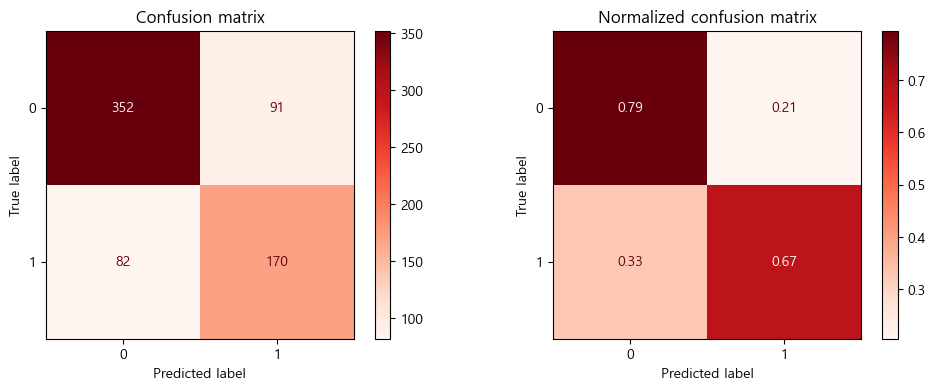

In [88]:
get_evaluation(y_test, prediction, ada, X_test)

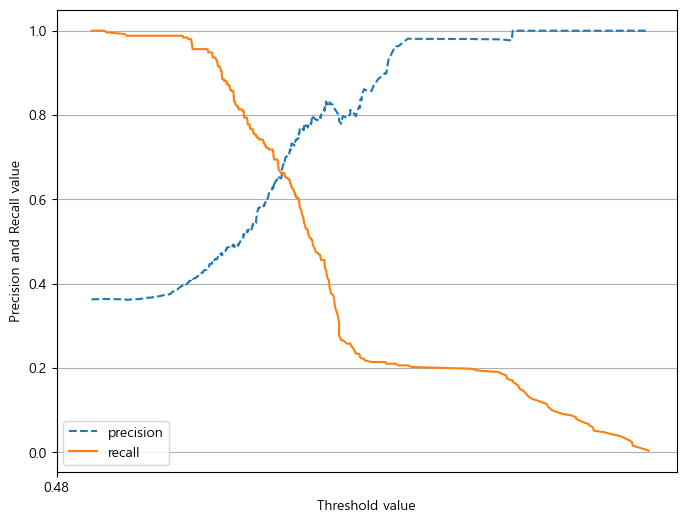

In [89]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test , proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, ada.predict_proba(X_test)[:, 1].reshape(-1, 1))

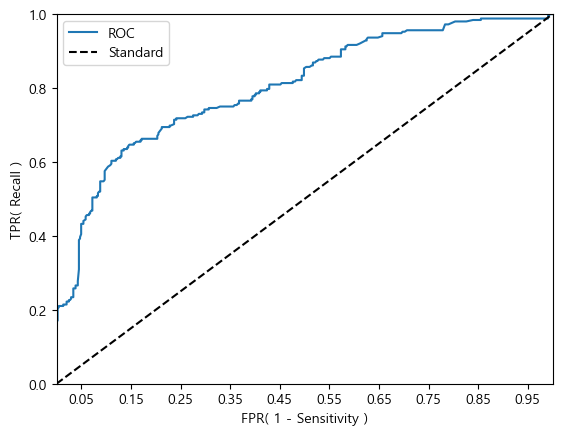

In [90]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, ada.predict_proba(X_test)[:, 1].reshape(-1, 1))

#### 📌 6-1. AdaBoosting 결과
Adaboosting을 사용하여 <strong>learning_rate=1, n_estimators=50</strong> 일 때, 가장 높은 성능을 보이며,  
<strong>정확도: 0.7511, 정밀도: 0.6513, 재현율: 0.6746, F1: 0.6628, ROC-AUC: 0.7346
</strong>이다.  

다음으로는 GBM (Gradient Boosting Machine)을 사용해보도록 하겠다.

### 6-2. GBM (Gredient Boost Machine)

In [91]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingClassifier

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_gbc = GridSearchCV(GradientBoostingClassifier(loss='log_loss'), param_grid=parameters, cv=3)
g_gbc.fit(X_train_over, y_train_over)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]})

In [92]:
gbc_result_df = pd.DataFrame(g_gbc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(gbc_result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.809040,2
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.809322,1
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.797740,9
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.807345,4
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.807910,3
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.801695,7
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.802542,6
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.803390,5
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.800282,8
9,"{'learning_rate': 1, 'n_estimators': 50}",0.797740,9


In [93]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Oranges, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [94]:
gbc = g_gbc.best_estimator_
prediction = gbc.predict(X_test)
gbc_ac = round(accuracy_score(y_test , prediction), 4)
gbc_pr = round(precision_score(y_test , prediction), 4)
gbc_rc = round(recall_score(y_test , prediction), 4)
gbc_f1 = round(f1_score(y_test , prediction), 4)
gbc_rac = round(roc_auc_score(y_test , prediction), 4)

오차 행렬
[[385  58]
 [ 76 176]]
정확도: 0.8072, 정밀도: 0.7521, 재현율: 0.6984, F1: 0.7243, ROC-AUC: 0.7837
################################################################################


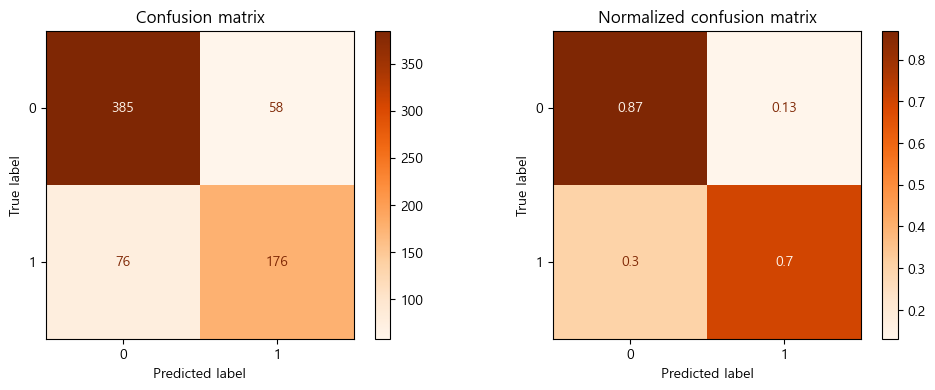

In [95]:
get_evaluation(y_test, prediction, gbc, X_test)

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


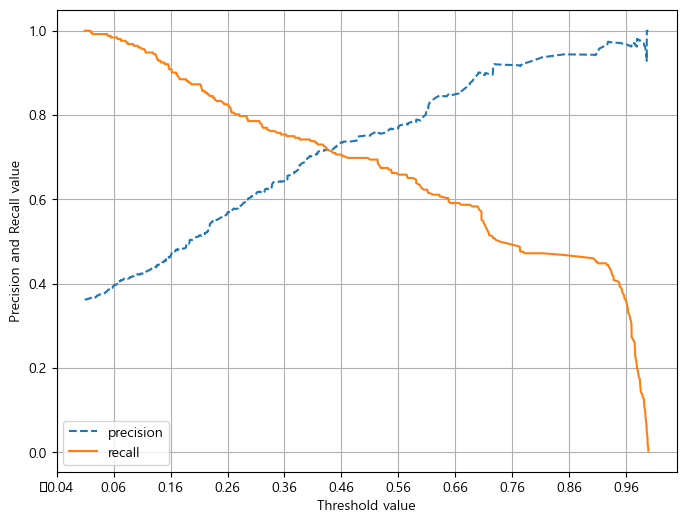

In [96]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test , proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, gbc.predict_proba(X_test)[:, 1].reshape(-1, 1))

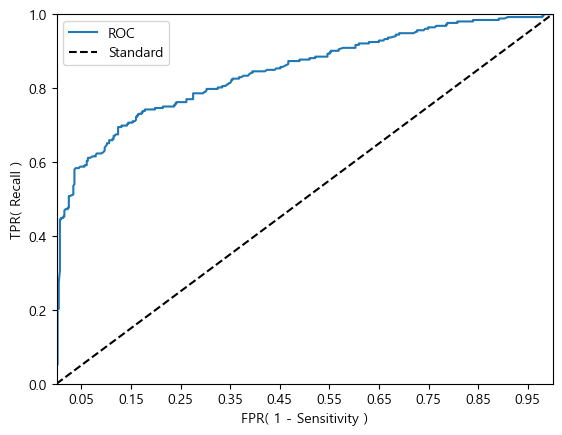

In [97]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, gbc.predict_proba(X_test)[:, 1].reshape(-1, 1))

#### 📌 6-2. GBM (Gredient Boost Machine)
GBM을 사용하여 <strong>learning_rate: 0.3, n_estimators: 100</strong> 일 때, 가장 높은 성능을 보이며,  
<strong>정확도: 0.8072, 정밀도: 0.7521, 재현율: 0.6984, F1: 0.7243, ROC-AUC: 0.7837</strong>이다.  

다음으로는 XGBoost (eXtra Gradient Boost)를 사용해보도록 하겠다.

### 6-3. XGBoost(eXtra Gradient Boosting)

In [98]:
from sklearn.model_selection import train_test_split

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

In [99]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

xgb = XGBClassifier()

g_xgb = GridSearchCV(xgb, 
                     param_grid=parameters, 
                     cv=5, 
                     refit=True, 
                     return_train_score=True, 
                     n_jobs=-1)

g_xgb.fit(X_train_over, y_train_over, early_stopping_rounds=50, eval_set=evals)

[0]	validation_0-logloss:0.46941	validation_1-logloss:0.48341
[1]	validation_0-logloss:0.41057	validation_1-logloss:0.43004
[2]	validation_0-logloss:0.38655	validation_1-logloss:0.41388
[3]	validation_0-logloss:0.37475	validation_1-logloss:0.40390
[4]	validation_0-logloss:0.36768	validation_1-logloss:0.39667
[5]	validation_0-logloss:0.36319	validation_1-logloss:0.39223
[6]	validation_0-logloss:0.35574	validation_1-logloss:0.38497
[7]	validation_0-logloss:0.35442	validation_1-logloss:0.37921
[8]	validation_0-logloss:0.34514	validation_1-logloss:0.37587
[9]	validation_0-logloss:0.34053	validation_1-logloss:0.36741
[10]	validation_0-logloss:0.33319	validation_1-logloss:0.36321
[11]	validation_0-logloss:0.33104	validation_1-logloss:0.36214
[12]	validation_0-logloss:0.32605	validation_1-logloss:0.35940
[13]	validation_0-logloss:0.32058	validation_1-logloss:0.35466
[14]	validation_0-logloss:0.31951	validation_1-logloss:0.35322
[15]	validation_0-logloss:0.31442	validation_1-logloss:0.34925
[1

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [100]:
xgb_result_df = pd.DataFrame(g_xgb.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(xgb_result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.816102,3
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.816667,2
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.808475,10
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.815254,4
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.813277,6
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.809887,7
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.818644,1
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.813842,5
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.809605,8
9,"{'learning_rate': 1, 'n_estimators': 50}",0.809040,9


In [101]:
xgb = g_xgb.best_estimator_
prediction = xgb.predict(X_test)
xgb_ac = round(accuracy_score(y_test , prediction), 4)
xgb_pr = round(precision_score(y_test , prediction), 4)
xgb_rc = round(recall_score(y_test , prediction), 4)
xgb_f1 = round(f1_score(y_test , prediction), 4)
xgb_rac = round(roc_auc_score(y_test , prediction), 4)

오차 행렬
[[377  66]
 [ 85 167]]
정확도: 0.7827, 정밀도: 0.7167, 재현율: 0.6627, F1: 0.6887, ROC-AUC: 0.7569
################################################################################


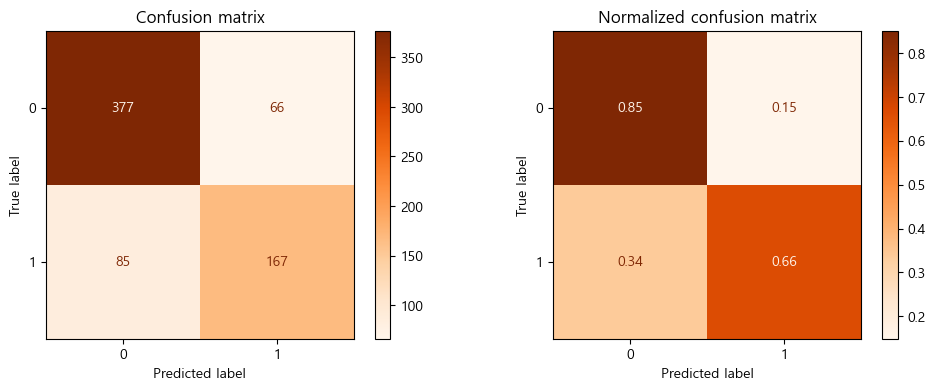

In [102]:
get_evaluation(y_test, prediction, xgb, X_test)

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


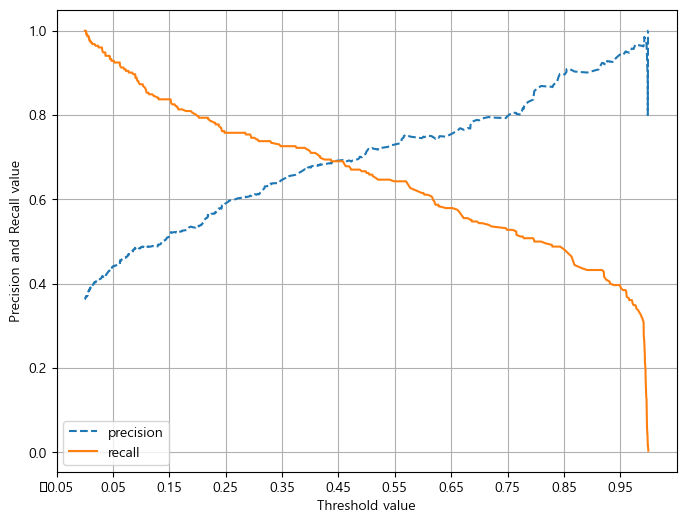

In [103]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test , proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, xgb.predict_proba(X_test)[:, 1].reshape(-1, 1))

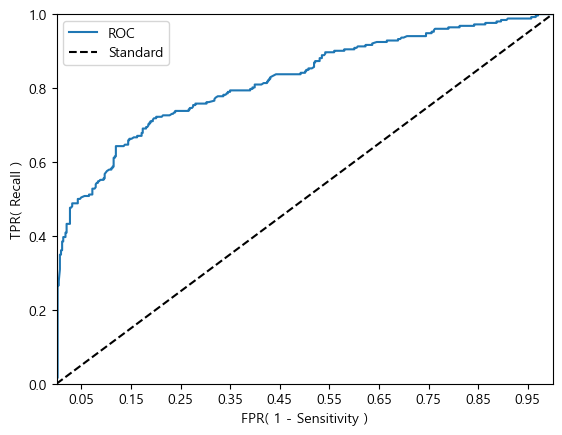

In [104]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, xgb.predict_proba(X_test)[:, 1].reshape(-1, 1))

#### 📌 6-3. XGBoost(eXtra Gradient Boosting) 결과
XGBoost를 사용하여 <strong>learning_rate: 0.7, n_estimators: 50</strong> 일 때, 가장 높은 성능을 보이며,  
<strong>정확도: 0.7827, 정밀도: 0.7167, 재현율: 0.6627, F1: 0.6887, ROC-AUC: 0.7569</strong>이다.  

마지막으로는LightGBM(Light Gradient Boosting Machine)을를 사용해보도록 하겠다.

### 6-4. LightGBM(Light Gradient Boosting Machine)

In [105]:
from sklearn.model_selection import GridSearchCV, train_test_split
from lightgbm import LGBMClassifier

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

g_lgbm = GridSearchCV(LGBMClassifier(), param_grid=parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)
g_lgbm.fit(X_train_over, y_train_over, eval_set=evals)

[LightGBM] [Info] Number of positive: 1770, number of negative: 1770
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 3540, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [106]:
lgbm_result_df = pd.DataFrame(g_lgbm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(lgbm_result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.808192,6
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.808192,6
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.810169,2
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.810734,1
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.808192,6
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.809322,3
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.807345,9
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.806780,10
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.801695,12
9,"{'learning_rate': 1, 'n_estimators': 50}",0.808757,4


In [107]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Greens, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [108]:
lgbm = g_lgbm.best_estimator_
prediction = lgbm.predict(X_test)
lgbm_ac = round(accuracy_score(y_test , prediction), 4)
lgbm_pr = round(precision_score(y_test , prediction), 4)
lgbm_rc = round(recall_score(y_test , prediction), 4)
lgbm_f1 = round(f1_score(y_test , prediction), 4)
lgbm_rac = round(roc_auc_score(y_test , prediction), 4)

오차 행렬
[[378  65]
 [ 81 171]]
정확도: 0.7899, 정밀도: 0.7246, 재현율: 0.6786, F1: 0.7008, ROC-AUC: 0.7659
################################################################################


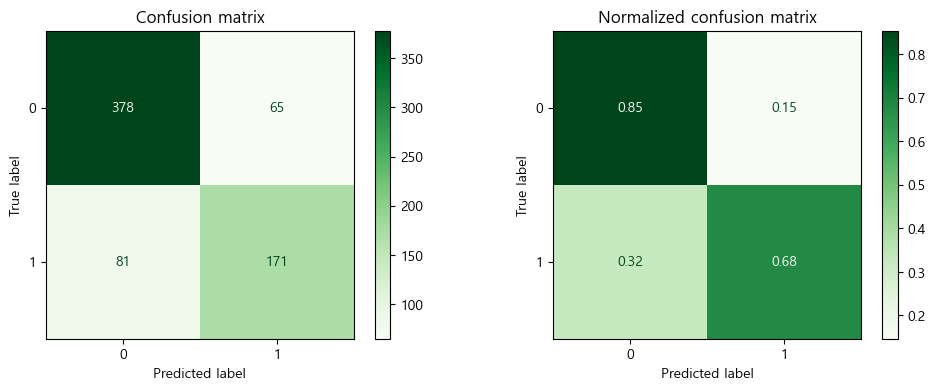

In [109]:
get_evaluation(y_test, prediction, lgbm, X_test)

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


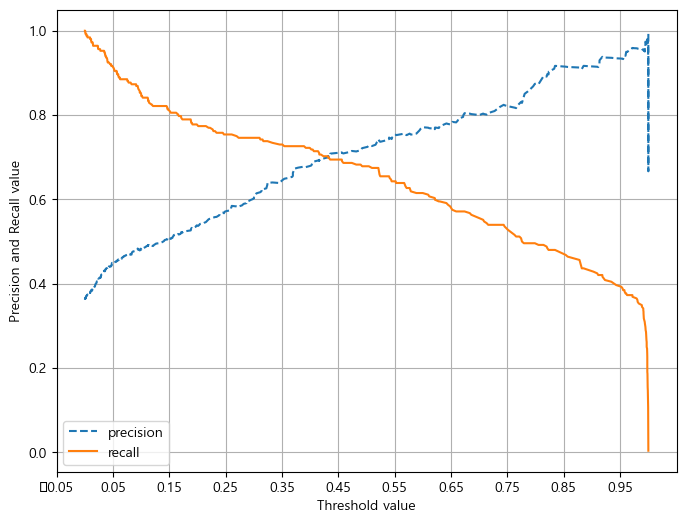

In [110]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test , proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm.predict_proba(X_test)[:, 1].reshape(-1, 1))

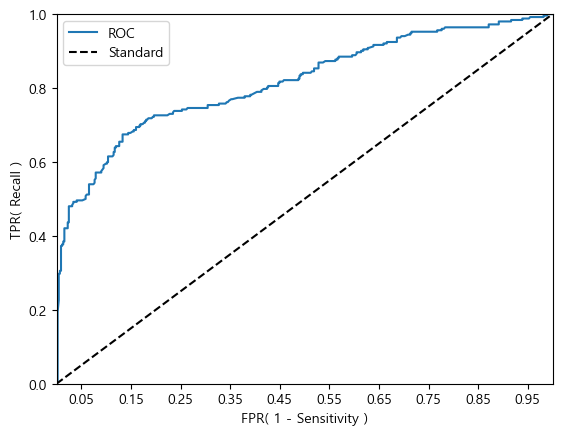

In [111]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lgbm.predict_proba(X_test)[:, 1].reshape(-1, 1))

#### 📌 6-4. LightGBM(Light Gradient Boosting Machine) 결과
LightGBM을 사용하여 <strong>learning_rate: 0.3, n_estimators: 50</strong> 일 때, 가장 높은 성능을 보이며,  
<strong>정확도: 0.7899, 정밀도: 0.7246, 재현율: 0.6786, F1: 0.7008, ROC-AUC: 0.7659</strong>이다.  

### 전체 시각화 비교

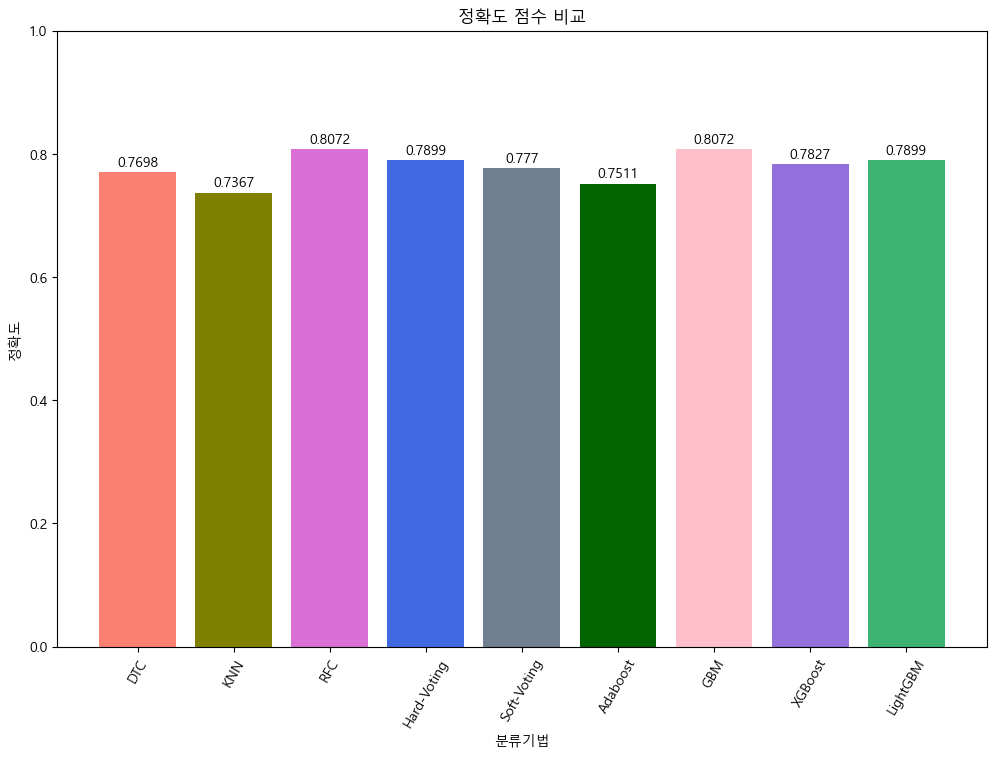

In [112]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(12, 8))
colors = ['salmon', 'olive', 'orchid', 'royalblue', 'slategrey', 'darkgreen', 'pink', 'mediumpurple', 'mediumseagreen']
accuracies = [dtc_ac,
              knn_ac,
              rfc_ac,
              hv_ac,
              sv_ac,
              ada_ac,
              gbc_ac,
              xgb_ac,
              lgbm_ac
             ]
classifiers = ['DTC', 'KNN', 'RFC', 'Hard-Voting', 'Soft-Voting', 'Adaboost', 'GBM', 'XGBoost', 'LightGBM']
plt.bar(classifiers, accuracies, color=colors)
plt.xlabel('분류기법')
plt.ylabel('정확도')
plt.title('정확도 점수 비교')
plt.ylim(0, 1)
plt.xticks(rotation=60)

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, str(v), color='black', ha='center')
plt.show()

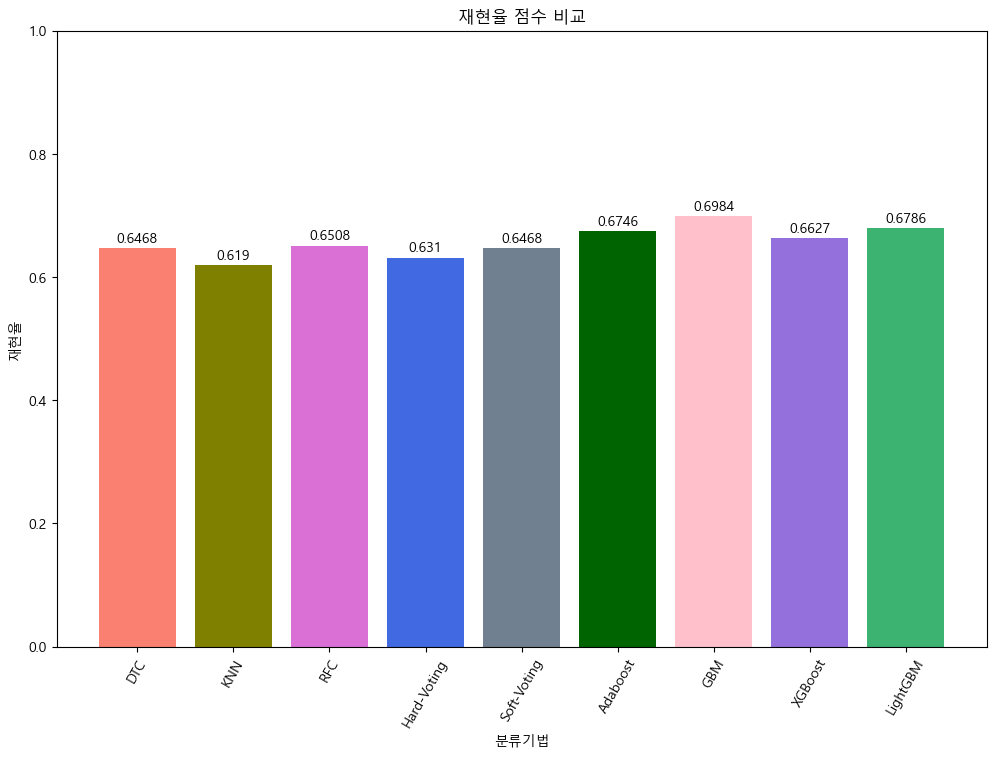

In [113]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(12, 8))
colors = ['salmon', 'olive', 'orchid', 'royalblue', 'slategrey', 'darkgreen', 'pink', 'mediumpurple', 'mediumseagreen']
recalls = [dtc_rc,
              knn_rc,
              rfc_rc,
              hv_rc,
              sv_rc,
              ada_rc,
              gbc_rc,
              xgb_rc,
              lgbm_rc
             ]
classifiers = ['DTC', 'KNN', 'RFC', 'Hard-Voting', 'Soft-Voting', 'Adaboost', 'GBM', 'XGBoost', 'LightGBM']
plt.bar(classifiers, recalls, color=colors)
plt.xlabel('분류기법')
plt.ylabel('재현율')
plt.title('재현율 점수 비교')
plt.ylim(0, 1)
plt.xticks(rotation=60)

for i, v in enumerate(recalls):
    plt.text(i, v + 0.01, str(v), color='black', ha='center')
plt.show()

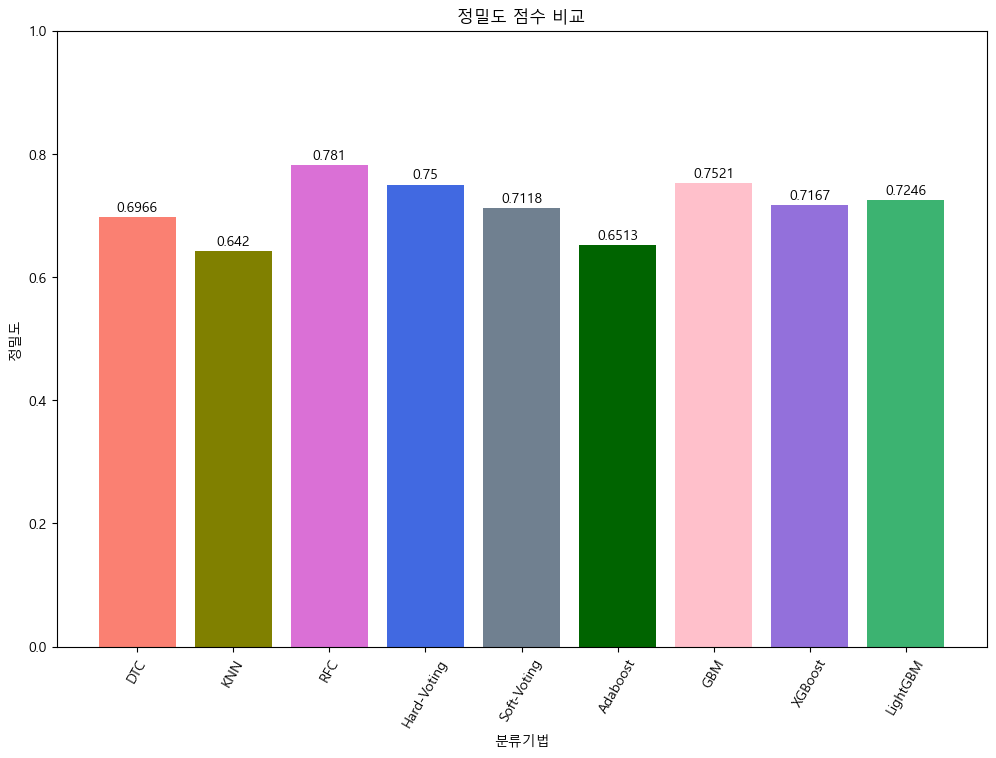

In [114]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(12, 8))
colors = ['salmon', 'olive', 'orchid', 'royalblue', 'slategrey', 'darkgreen', 'pink', 'mediumpurple', 'mediumseagreen']
f1s = [dtc_pr,
       knn_pr,
       rfc_pr,
       hv_pr,
       sv_pr,
       ada_pr,
       gbc_pr,
       xgb_pr,
       lgbm_pr
      ]
classifiers = ['DTC', 'KNN', 'RFC', 'Hard-Voting', 'Soft-Voting', 'Adaboost', 'GBM', 'XGBoost', 'LightGBM']
plt.bar(classifiers, f1s, color=colors)
plt.xlabel('분류기법')
plt.ylabel('정밀도')
plt.title('정밀도 점수 비교')
plt.ylim(0, 1)
plt.xticks(rotation=60)

for i, v in enumerate(f1s):
    plt.text(i, v + 0.01, str(v), color='black', ha='center')
plt.show()

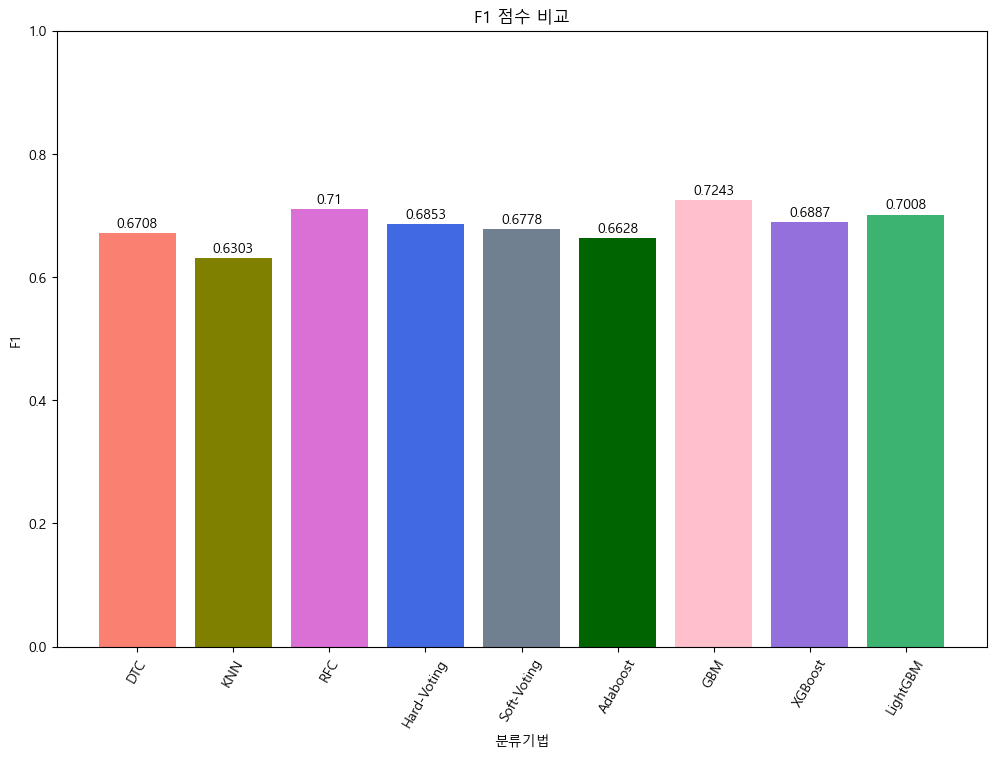

In [115]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(12, 8))
colors = ['salmon', 'olive', 'orchid', 'royalblue', 'slategrey', 'darkgreen', 'pink', 'mediumpurple', 'mediumseagreen']
f1s = [dtc_f1,
       knn_f1,
       rfc_f1,
       hv_f1,
       sv_f1,
       ada_f1,
       gbc_f1,
       xgb_f1,
       lgbm_f1
      ]
classifiers = ['DTC', 'KNN', 'RFC', 'Hard-Voting', 'Soft-Voting', 'Adaboost', 'GBM', 'XGBoost', 'LightGBM']
plt.bar(classifiers, f1s, color=colors)
plt.xlabel('분류기법')
plt.ylabel('F1')
plt.title('F1 점수 비교')
plt.ylim(0, 1)
plt.xticks(rotation=60)

for i, v in enumerate(f1s):
    plt.text(i, v + 0.01, str(v), color='black', ha='center')
plt.show()

## 📋 전체 시각화 결론   
위의 그래프를 토대로 가장 <strong>성능이 좋은 분류기는 GBM</strong>이다.  
<strong>GBM이 가장 높은 정확도</strong>를 보이며, 대부분의 지표에서 상대적으로 높은 점수를 얻고 있다.  
특히 <strong>정확도, 정밀도, ROC-AUC가</strong> 다른 모델들에 비해 <strong>우수</strong>하다.  
따라서 해당 데이터 세트에서는 <strong>GBM이 가장 성능이 좋은 모델</strong>로 평가된다.

### 7. Upgrade

위 그래프를 통해서 가장 우수하다고 판단 되었던 GBM의 성능을 좀 더 높혀보도록 하겠다.  
업그레이드 방향은 위에서 수립했던 '정밀도와 재현율' 을 기반으로 <strong>재현율을 조금 더 높혀보는 것</strong>이다.

In [116]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingClassifier

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_gbc = GridSearchCV(GradientBoostingClassifier(loss='log_loss'), param_grid=parameters, cv=3)
g_gbc.fit(X_train_over, y_train_over)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]})

In [117]:
gbc_result_df = pd.DataFrame(g_gbc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(gbc_result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.808757,2
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.809322,1
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.797740,9
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.807627,4
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.807910,3
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.801412,7
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.802825,6
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.803390,5
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.800000,8
9,"{'learning_rate': 1, 'n_estimators': 50}",0.797740,9


In [118]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Oranges, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [119]:
gbc = g_gbc.best_estimator_
prediction = gbc.predict(X_test)
gbc_ac = round(accuracy_score(y_test , prediction), 4)
gbc_pr = round(precision_score(y_test , prediction), 4)
gbc_rc = round(recall_score(y_test , prediction), 4)
gbc_f1 = round(f1_score(y_test , prediction), 4)
gbc_rac = round(roc_auc_score(y_test , prediction), 4)

오차 행렬
[[385  58]
 [ 76 176]]
정확도: 0.8072, 정밀도: 0.7521, 재현율: 0.6984, F1: 0.7243, ROC-AUC: 0.7837
################################################################################


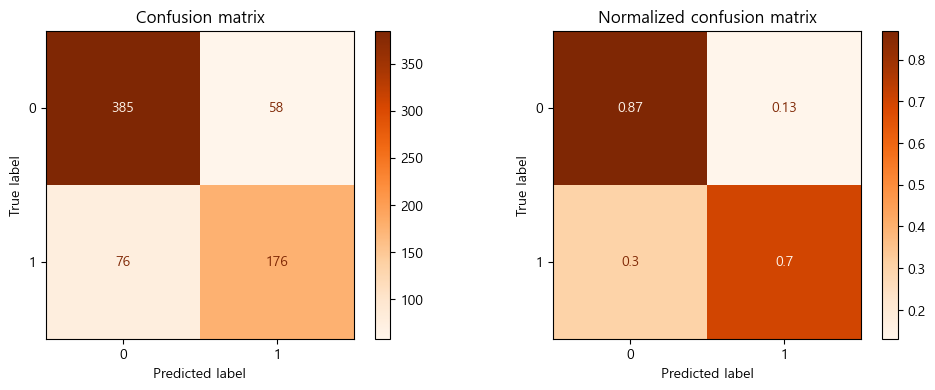

In [120]:
get_evaluation(y_test, prediction, gbc, X_test)

In [121]:
proba_class1 = gbc.predict_proba(X_test)[:, 1].reshape(-1, 1)
_, _, thresholds = precision_recall_curve(y_test, proba_class1)
thresholds

array([0.00884348, 0.0137541 , 0.01430636, 0.01694843, 0.01828016,
       0.01866552, 0.01880069, 0.0194146 , 0.01951438, 0.02143352,
       0.02259322, 0.02506604, 0.02552316, 0.02794504, 0.02815385,
       0.02872363, 0.02890327, 0.02984824, 0.02999095, 0.03121847,
       0.03155252, 0.03385145, 0.03528301, 0.03891118, 0.04261859,
       0.0431978 , 0.04335759, 0.04419327, 0.04433303, 0.04458759,
       0.04524323, 0.04583904, 0.04693766, 0.04736703, 0.04756574,
       0.04792725, 0.04838563, 0.048793  , 0.04893624, 0.04957576,
       0.05012004, 0.05037489, 0.05431229, 0.0543923 , 0.05557187,
       0.05724062, 0.05769334, 0.05775705, 0.05810315, 0.05863117,
       0.05900192, 0.0591152 , 0.05947061, 0.0600457 , 0.06052945,
       0.06060776, 0.06290531, 0.06486351, 0.06562514, 0.06572216,
       0.06616824, 0.06651327, 0.06656806, 0.06727766, 0.06783484,
       0.06824931, 0.06850635, 0.06990097, 0.07222715, 0.07242732,
       0.07245147, 0.07329838, 0.07366066, 0.07608325, 0.07663

In [122]:
get_evaluation_by_thresholds(y_test, proba_class1, thresholds)

0.00884347549626799
오차 행렬
[[  1 442]
 [  0 252]]
정확도: 0.3640, 정밀도: 0.3631, 재현율: 1.0000, F1: 0.5328, ROC-AUC: 0.5011
################################################################################
0.013754096542722092
오차 행렬
[[  3 440]
 [  0 252]]
정확도: 0.3669, 정밀도: 0.3642, 재현율: 1.0000, F1: 0.5339, ROC-AUC: 0.5034
################################################################################
0.014306360410461273
오차 행렬
[[  4 439]
 [  0 252]]
정확도: 0.3683, 정밀도: 0.3647, 재현율: 1.0000, F1: 0.5345, ROC-AUC: 0.5045
################################################################################
0.01694843367851022
오차 행렬
[[  5 438]
 [  0 252]]
정확도: 0.3698, 정밀도: 0.3652, 재현율: 1.0000, F1: 0.5350, ROC-AUC: 0.5056
################################################################################
0.01828015923948776
오차 행렬
[[  6 437]
 [  0 252]]
정확도: 0.3712, 정밀도: 0.3657, 재현율: 1.0000, F1: 0.5356, ROC-AUC: 0.5068
################################################################################
0.01866551741

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [145]:
from sklearn.preprocessing import Binarizer

threshold = 0.3653563946464948

proba = gbc.predict_proba(X_test)
prediction = gbc.predict(X_test)
gbc_ac1 = round(accuracy_score(y_test , custom_prediction), 4)
gbc_pr1 = round(precision_score(y_test , custom_prediction), 4)
gbc_rc1 = round(recall_score(y_test , custom_prediction), 4)
gbc_f11 = round(f1_score(y_test , custom_prediction), 4)
gbc_rac1 = round(roc_auc_score(y_test , custom_prediction), 4)

In [146]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation_by_custom_proba(y_test, prediction, visualize=False):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if visualize:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_predictions(y_test, prediction, ax=ax, cmap=plt.cm.Greens, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[345  98]
 [ 63 189]]
정확도: 0.7683, 정밀도: 0.6585, 재현율: 0.7500, F1: 0.7013, ROC-AUC: 0.7644
################################################################################


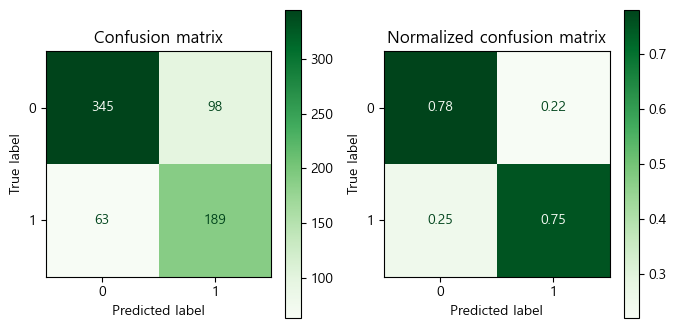

In [147]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation_by_custom_proba(y_test, custom_prediction, visualize=True)

In [148]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
def precision_recall_f1_curve_plot(y_test , proba_class1, threshold=0.5):
    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
    # X축: threshold
    # Y축: 정밀도, 재현율
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    plt.plot(thresholds, f1_scores[0:threshold_boundary], linestyle='--', label='f1 Score')
    # Threshold가 0.5인 선 추가
    plt.axvline(x=threshold, color='red', linestyle=':', label='Threshold: {}'.format(threshold))
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall and F1 Score')
    plt.legend()
    plt.grid()
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


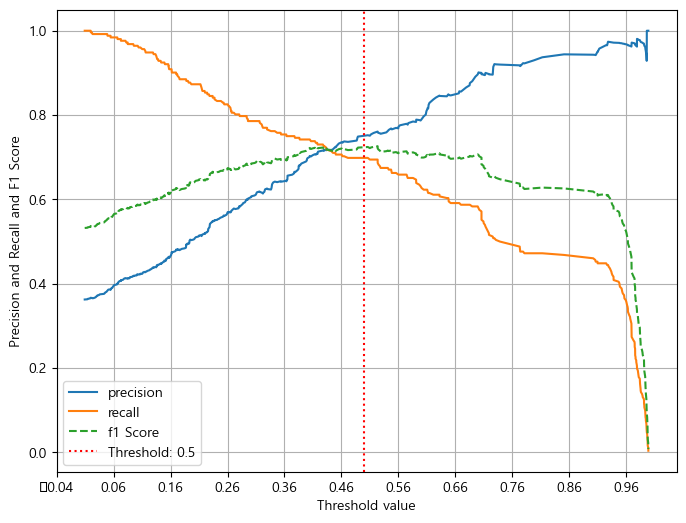

In [149]:
precision_recall_f1_curve_plot(y_test, gbc.predict_proba(X_test)[:, 1].reshape(-1, 1))

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


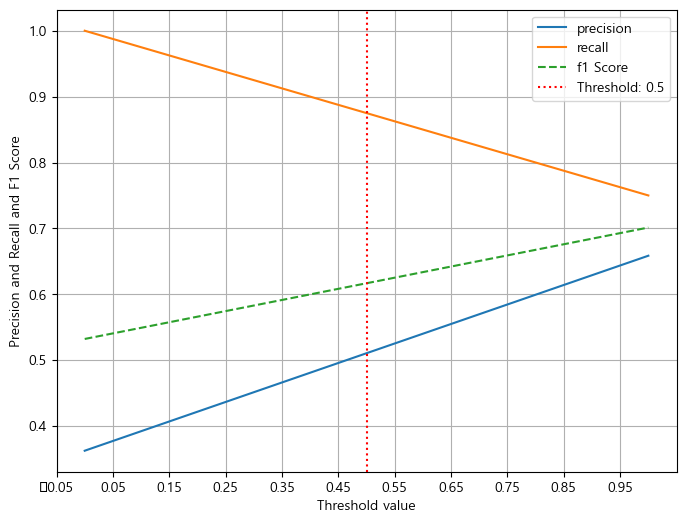

In [150]:
precision_recall_f1_curve_plot(y_test, custom_prediction)

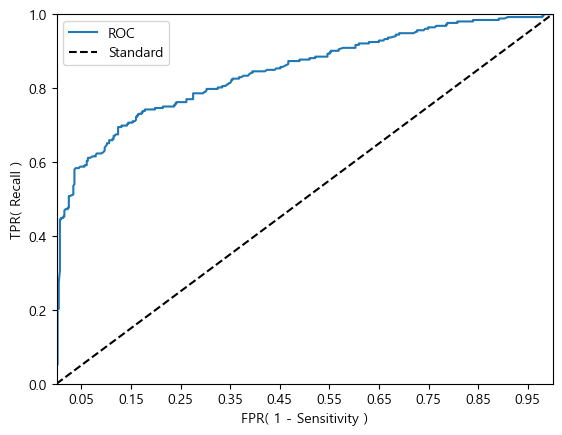

In [151]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, gbc.predict_proba(X_test)[:, 1].reshape(-1, 1))

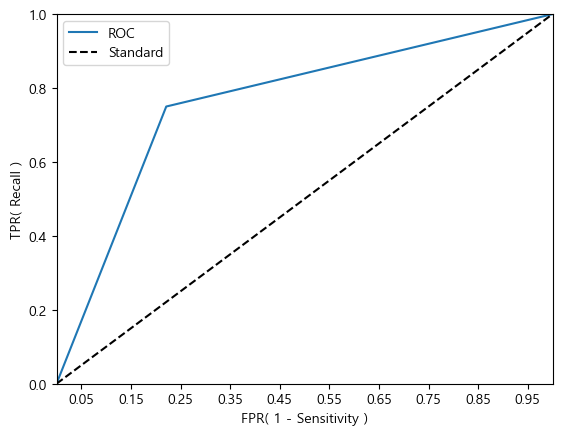

In [152]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, custom_prediction)

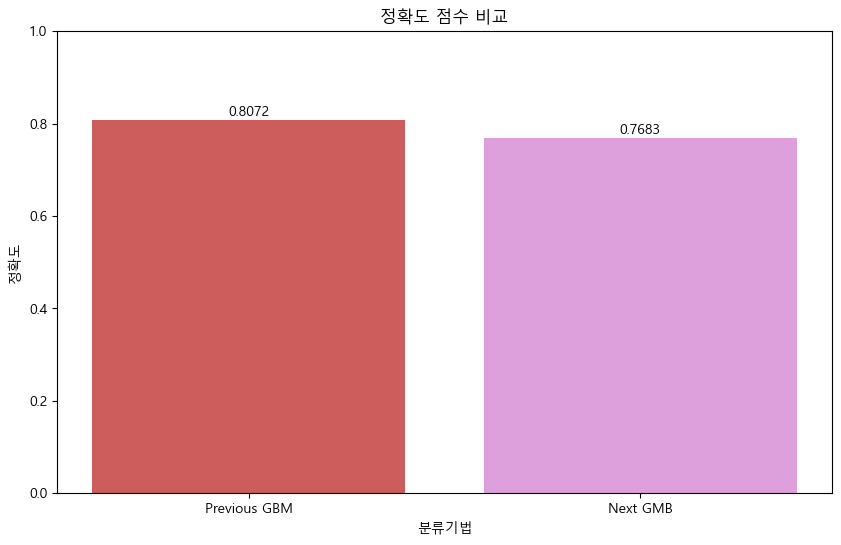

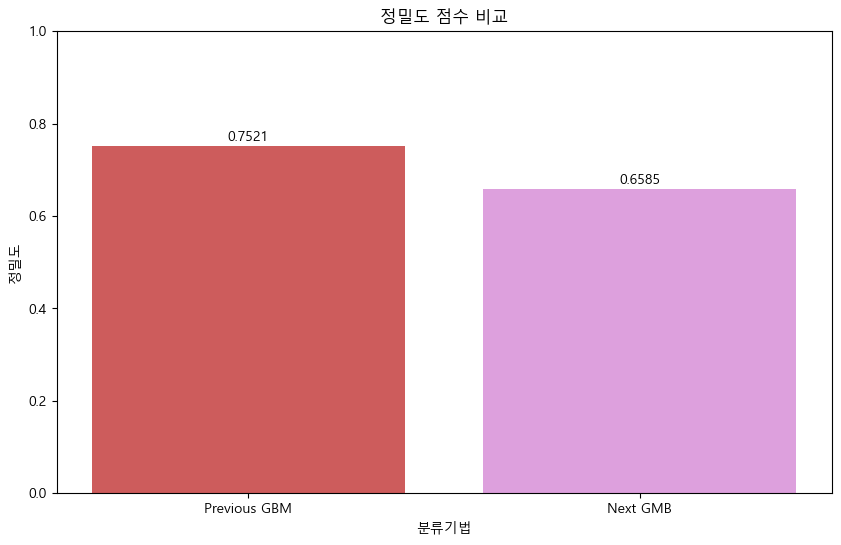

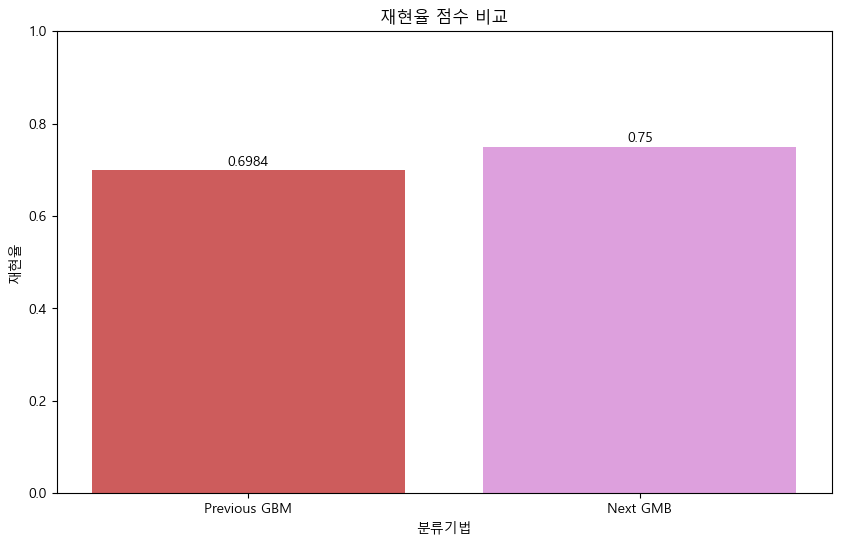

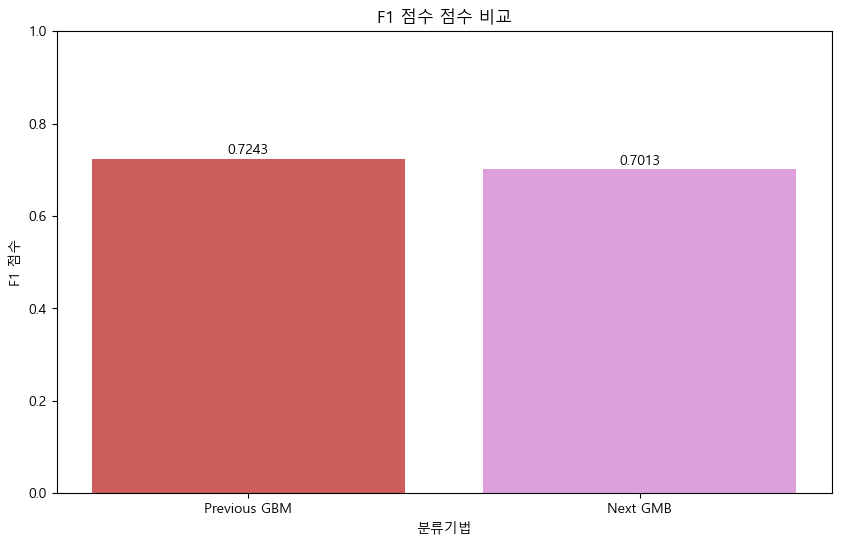

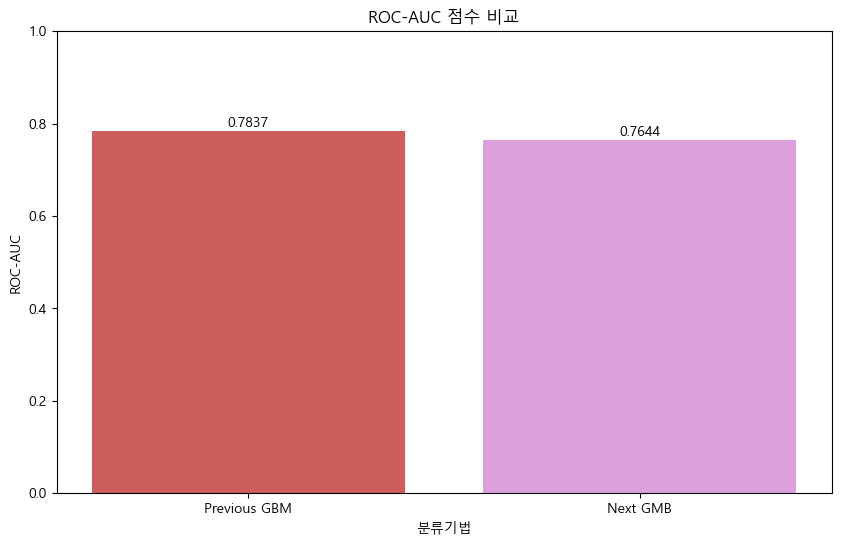

In [153]:
import matplotlib.pyplot as plt

# Setting up the fonts and figure
plt.rcParams['font.family'] = 'Malgun Gothic'

# Data for the graphs
metrics = {
    '정확도': [gbc_ac, gbc_ac1],
    '정밀도': [gbc_pr, gbc_pr1],
    '재현율': [gbc_rc, gbc_rc1],
    'F1 점수': [gbc_f1, gbc_f11],
    'ROC-AUC': [gbc_rac, gbc_rac1]
}

colors = ['indianred', 'plum']
classifiers = ['Previous GBM', 'Next GMB']

# Plotting
for metric, values in metrics.items():
    plt.figure(figsize=(10, 6))
    plt.bar(classifiers, values, color=colors)
    plt.xlabel('분류기법')
    plt.ylabel(metric)
    plt.title(f'{metric} 점수 비교')
    plt.ylim(0, 1)

    for i, v in enumerate(values):
        plt.text(i, v + 0.01, str(v), color='black', ha='center')

    plt.show()

## 7. Upgrade 결과

임계치를 0.3653563946464948로 조정함으로써, <strong>재현율을 높이는데에 초점</strong>을 맞추었다.  
비록 정확도와 정밀도가 감소하기 하였지만, <strong>재현율을 높임으로써</strong> 실제로 퇴사할 직원들을 놓치지 않고 <strong>예측을 더 잘할 수 있게</strong> 되었다.  

### 📝 결론

재현율이 더 높은 값을 가지는 Next GBM은 당초 수립 했던 '정밀도와 재현율'의 방향인 <strong>재현율을 높이는 것에 대해서 부합</strong>하며, 정밀도와 재현율, 정확도, F1 점수 모두 만족하는 결과이다.